Project title:- Optimizing IT Support Team Performance Using Analytics ( Supportlytics)

Week 1:-

Module 1:- Project Initialization and Dataset Setup
• Define objectives, KPIs, and workflow
• Load the CSV dataset using pandas
• Explore schema, data types, and missing values
• Calculate initial ticket distribution by Type, Priority, and Category

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset-tickets-multi-lang3-4k_en.csv to dataset-tickets-multi-lang3-4k_en.csv


In [ ]:
df = pd.read_csv("dataset-tickets-multi-lang3-4k_en.csv")

In [ ]:
df.head(100)

,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,Urgent Assistance Required: AWS Service,"Dear IT Services Support Team, \n\nI am reachi...","Dear <name>,\n\nThank you for reaching out reg...",Request,IT Support,high,en,IT Services,IT Support,Urgent Issue,Service Notification,Cloud Services,Problem Resolution,Technical Guidance,Performance Tuning,NaN,NaN
1,Urgent: Issue with Zoom Screen Sharing Feature,"Dear Customer Support,\n\nI am experiencing a ...","Dear <name>,\n\nThank you for reaching out. We...",Incident,Technical Support,high,en,IT Services,Technical Support,Urgent Issue,Service Disruption,Problem Resolution,Software Bug,NaN,NaN,NaN,NaN
2,Service outage resolution requested for ongoin...,"Dear IT Services Customer Support,\n\nI am wri...","Dear <name>,\n\nThank you for reaching out to ...",Change,Service Outages and Maintenance,high,en,IT Services,Service Outage,IT Support,Problem Resolution,Technical Support,Service Recovery,System Maintenance,Performance Tuning,Urgent Issue,NaN
3,Surface Pro 7 Issue,"Dear Tech Online Store Support Team,\n\nI hope...","Dear <name>,\n\nThank you for reaching out to ...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,Product Support,Software Bug,Hardware Failure,Problem Resolution,Service Recovery,NaN,NaN,NaN
4,Request for software development consultation ...,"Dear Customer Support,\n\nI hope this message ...","Dear <name>,\n\nThank you for reaching out reg...",Request,Technical Support,medium,en,IT Services,IT Support,Technical Guidance,Problem Resolution,Service Notification,Urgent Issue,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,High Priority Request: Server Administration I...,"Dear Customer Support,\n\nI am writing to requ...","Dear <name>,\n\nThank you for reaching out reg...",Request,Technical Support,high,en,IT Services,Technical Support,IT Support,Urgent Issue,Service Disruption,Problem Resolution,NaN,NaN,NaN,NaN
96,Urgent Cisco Router Issue,"Dear IT Services Customer Support,\n\nWe are r...","Dear <name>,\n\nThank you for reaching out to ...",Incident,IT Support,high,en,IT Services,Technical Support,Network Issue,Service Outage,Urgent Issue,Problem Resolution,Incident Report,NaN,NaN,NaN
97,Refund Request for Returned MacBook Air M1,"Dear Customer Support, I am writing to request...","Dear <name>, \n\nThank you for your email. We ...",Request,Billing and Payments,high,en,Tech Online Store,Refund Request,Returns and Exchanges,Customer Service,Billing Issue,Order Issue,NaN,NaN,NaN,NaN
98,NaN,"Dear Customer Support,\n\nI am writing to brin...","Dear <name>,\n\nThank you for reaching out. We...",Request,Billing and Payments,high,en,Tech Online Store,Billing Issue,Account Assistance,Customer Service,Refund Request,Problem Resolution,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(1391, 17)

In [ ]:
df.columns

Index(['subject', 'body', 'answer', 'type', 'queue', 'priority', 'language',
       'business_type', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6',
       'tag_7', 'tag_8', 'tag_9'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject        1391 non-null   object 
 1   body           1391 non-null   object 
 2   answer         1391 non-null   object 
 3   type           1391 non-null   object 
 4   queue          1391 non-null   object 
 5   priority       1391 non-null   object 
 6   language       1391 non-null   object 
 7   business_type  1391 non-null   object 
 8   tag_1          1391 non-null   object 
 9   tag_2          1391 non-null   object 
 10  tag_3          1391 non-null   object 
 11  tag_4          1391 non-null   object 
 12  tag_5          1178 non-null   object 
 13  tag_6          751 non-null    object 
 14  tag_7          364 non-null    object 
 15  tag_8          107 non-null    object 
 16  tag_9          0 non-null      float64
dtypes: float64(1), object(16)
memory usage: 184.9+ KB


In [ ]:
df.isnull().sum()

,0
subject,171
body,1
answer,0
type,0
queue,0
priority,0
language,0
business_type,0
tag_1,0
tag_2,0


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.fillna("Unknown", inplace=True)

/tmp/ipython-input-839676283.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Unknown", inplace=True)


In [ ]:
df.isnull().sum()

,0
subject,0
body,0
answer,0
type,0
queue,0
priority,0
language,0
business_type,0
tag_1,0
tag_2,0


In [ ]:
df1= pd.read_csv("dataset_tickets_english_only_clean.csv")

In [ ]:
df['final_language_check'] = df['body'].apply(detect_language)


In [ ]:
df['final_language_check'].value_counts()

,count
final_language_check,
en,1384
it,1
fr,1


In [ ]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

df = pd.read_csv("dataset_tickets_english_only_clean.csv")

In [ ]:
def detect_language(text):
    try:
        return detect(str(text))
    except LangDetectException:
        return "unknown"

In [ ]:
df['language_check'] = df['body'].apply(detect_language)

In [ ]:
df_it = df[df['language_check'] == 'it']

In [ ]:
print("Number of Italian rows:", df_it.shape[0])

Number of Italian rows: 1


In [ ]:
df.loc[df['language_check'] == 'it', 'language_check'] = 'en'

In [ ]:
print("Number of Italian rows:", df_it.shape[0])

Number of Italian rows: 1


In [ ]:
df['language_check'].value_counts()

,count
language_check,
en,1386


In [ ]:
df_fr = df[df['language_check'] == 'fr']

In [ ]:
print("Number of french rows:", df_fr.shape[0])

Number of french rows: 0


In [ ]:
df.head(10)

,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,urgent assistance required: aws service,"dear it services support team, i am reaching o...","dear <name>, thank you for reaching out regard...",Request,IT Support,high,en,IT Services,IT Support,Urgent Issue,Service Notification,Cloud Services,Problem Resolution,Technical Guidance,Performance Tuning,Unknown
1,urgent: issue with zoom screen sharing feature,"dear customer support, i am experiencing a hig...","dear <name>, thank you for reaching out. we un...",Incident,Technical Support,high,en,IT Services,Technical Support,Urgent Issue,Service Disruption,Problem Resolution,Software Bug,Unknown,Unknown,Unknown
2,service outage resolution requested for ongoin...,"dear it services customer support, i am writin...","dear <name>, thank you for reaching out to us ...",Change,Service Outages and Maintenance,high,en,IT Services,Service Outage,IT Support,Problem Resolution,Technical Support,Service Recovery,System Maintenance,Performance Tuning,Urgent Issue
3,surface pro 7 issue,"dear tech online store support team, i hope th...","dear <name>, thank you for reaching out to us ...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,Product Support,Software Bug,Hardware Failure,Problem Resolution,Service Recovery,Unknown,Unknown
4,request for software development consultation ...,"dear customer support, i hope this message fin...","dear <name>, thank you for reaching out regard...",Request,Technical Support,medium,en,IT Services,IT Support,Technical Guidance,Problem Resolution,Service Notification,Urgent Issue,Unknown,Unknown,Unknown
5,urgent aws deployment issues,"dear it services customer support, i hope this...","dear <name>, thank you for contacting it servi...",Request,Technical Support,medium,en,IT Services,IT Support,Service Disruption,Urgent Issue,Technical Support,System Maintenance,Incident Report,Unknown,Unknown
6,immediate assistance required for network disr...,"dear customer support, we are currently experi...","dear <name>, thank you for reaching out to us ...",Incident,Service Outages and Maintenance,high,en,IT Services,Network Issue,Service Disruption,Urgent Issue,Technical Support,Incident Report,Problem Resolution,Service Recovery,Unknown
7,NaN,"dear customer support, i hope this message fin...","dear <name>, thank you for reaching out to us....",Request,Billing and Payments,high,en,IT Services,Billing Issue,Account Assistance,Payment Processing,Customer Service,General Inquiry,Unknown,Unknown,Unknown
8,assistance needed for chrome crashes,"dear tech online store customer support, i am ...","dear <name>, thank you for contacting tech onl...",Problem,Technical Support,low,en,Tech Online Store,Technical Support,Software Bug,Problem Resolution,Customer Service,Unknown,Unknown,Unknown,Unknown
9,NaN,"dear customer care, i am encountering challeng...","dear <name>, we appreciate you getting in touc...",Problem,Technical Support,medium,en,IT Services,Technical Support,Product Support,Software Bug,Problem Resolution,Account Assistance,Unknown,Unknown,Unknown


In [ ]:
df.columns

Index(['subject', 'body', 'answer', 'type', 'queue', 'priority', 'language',
       'business_type', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6',
       'tag_7', 'tag_8', 'tag_9', 'language_check'],
      dtype='object')

In [ ]:
df['tag_9'].unique()

array(['Unknown'], dtype=object)

In [ ]:
df['tag_9'].value_counts(dropna=False)

,count
tag_9,
Unknown,1386


In [ ]:
df.drop(columns=['tag_9'], inplace=True)

In [ ]:
df.columns

Index(['subject', 'body', 'answer', 'type', 'queue', 'priority', 'language',
       'business_type', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6',
       'tag_7', 'tag_8', 'language_check'],
      dtype='object')

In [ ]:
df.drop(columns=['language_check'], inplace=True)

Week 2:-

Module 2:- Data Cleaning and Feature Engineering
• Handle missing or incorrect data in text fields
• Create new features: Resolution_Duration and Priority_Score
• Save processed data for analysis
• Deliverables: Cleaned dataset, Feature engineering summary, Data dictionary

In [ ]:
df.columns

Index(['subject', 'body', 'answer', 'type', 'queue', 'priority', 'language',
       'business_type', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6',
       'tag_7', 'tag_8'],
      dtype='object')

In [ ]:
df['tag_7'].unique()

array(['Performance Tuning', 'Unknown', 'Service Recovery',
       'Product Support', 'Service Notification', 'Critical Failure',
       'Incident Report', 'Service Disruption', 'Technical Guidance',
       'Problem Resolution', 'Hardware Failure', 'General Inquiry',
       'Urgent Issue', 'Cost Optimization', 'Refund Request',
       'Product Replacement', 'Email Setup', 'System Maintenance',
       'Consultation Request', 'System Crash', 'Cloud Services',
       'Order Issue', 'Technical Support', 'Account Assistance',
       'Login Issue', 'Customer Service', 'Warranty Claim',
       'Network Issue', 'IT Support', 'Documentation Request',
       'Customer Feedback', 'Software Bug', 'Feature Request',
       'Planned Change', 'Invoice Inquiry', 'Sales Inquiry',
       'AWS Management Service', 'Payment Processing',
       'WiFi Connectivity', 'Cloud Computing', 'Printer Issue',
       'Routine Request', 'Project Management', 'Cooling Issues',
       'Security Vulnerability', 'Server 

In [ ]:
df['tag_7'].value_counts(dropna=False)

,count
tag_7,
Unknown,1022
Service Recovery,54
Technical Guidance,41
Performance Tuning,34
Problem Resolution,29
Urgent Issue,23
Customer Service,15
General Inquiry,14
System Maintenance,13


In [ ]:
df = df.rename(columns={
    'tag_1': 'tag1_primary_issue_type',
    'tag_2': 'tag2_support_category',
    'tag_3': 'tag3_issue_nature',
    'tag_4': 'tag4_technology_area',
    'tag_5': 'tag5_resolution_type',
    'tag_6': 'tag6_support_action',
    'tag_7': 'tag7_performance_aspect',
    'tag_8': 'tag8_urgency_level'
})

print("\nTag columns renamed successfully")
print("Updated columns:")
print(df.columns)


Tag columns renamed successfully
Updated columns:
Index(['subject', 'body', 'answer', 'type', 'queue', 'priority', 'language',
       'business_type', 'tag1_primary_issue_type', 'tag2_support_category',
       'tag3_issue_nature', 'tag4_technology_area', 'tag5_resolution_type',
       'tag6_support_action', 'tag7_performance_aspect', 'tag8_urgency_level'],
      dtype='object')


In [ ]:
df.columns

Index(['subject', 'body', 'answer', 'type', 'queue', 'priority', 'language',
       'business_type', 'tag1_primary_issue_type', 'tag2_support_category',
       'tag3_issue_nature', 'tag4_technology_area', 'tag5_resolution_type',
       'tag6_support_action', 'tag7_performance_aspect', 'tag8_urgency_level'],
      dtype='object')

In [ ]:
from google.colab import files

files.download("dataset_tickets_with_descriptive_tags.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.head(2)

,subject,body,answer,type,queue,priority,language,business_type,tag1_primary_issue_type,tag2_support_category,tag3_issue_nature,tag4_technology_area,tag5_resolution_type,tag6_support_action,tag7_performance_aspect,tag8_urgency_level
0,urgent assistance required: aws service,"dear it services support team, i am reaching o...","dear <name>, thank you for reaching out regard...",Request,IT Support,high,en,IT Services,IT Support,Urgent Issue,Service Notification,Cloud Services,Problem Resolution,Technical Guidance,Performance Tuning,Unknown
1,urgent: issue with zoom screen sharing feature,"dear customer support, i am experiencing a hig...","dear <name>, thank you for reaching out. we un...",Incident,Technical Support,high,en,IT Services,Technical Support,Urgent Issue,Service Disruption,Problem Resolution,Software Bug,Unknown,Unknown,Unknown


In [ ]:
df.drop(columns=['id'], inplace=True)

In [ ]:
df01 = df.insert(0, 'id', range(0, len(df)))

In [ ]:
df.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag1_primary_issue_type,tag2_support_category,tag3_issue_nature,tag4_technology_area,tag5_resolution_type,tag6_support_action,tag7_performance_aspect,tag8_urgency_level
0,0,urgent assistance required: aws service,"dear it services support team, i am reaching o...","dear <name>, thank you for reaching out regard...",Request,IT Support,high,en,IT Services,IT Support,Urgent Issue,Service Notification,Cloud Services,Problem Resolution,Technical Guidance,Performance Tuning,Unknown
1,1,urgent: issue with zoom screen sharing feature,"dear customer support, i am experiencing a hig...","dear <name>, thank you for reaching out. we un...",Incident,Technical Support,high,en,IT Services,Technical Support,Urgent Issue,Service Disruption,Problem Resolution,Software Bug,Unknown,Unknown,Unknown
2,2,service outage resolution requested for ongoin...,"dear it services customer support, i am writin...","dear <name>, thank you for reaching out to us ...",Change,Service Outages and Maintenance,high,en,IT Services,Service Outage,IT Support,Problem Resolution,Technical Support,Service Recovery,System Maintenance,Performance Tuning,Urgent Issue
3,3,surface pro 7 issue,"dear tech online store support team, i hope th...","dear <name>, thank you for reaching out to us ...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,Product Support,Software Bug,Hardware Failure,Problem Resolution,Service Recovery,Unknown,Unknown
4,4,request for software development consultation ...,"dear customer support, i hope this message fin...","dear <name>, thank you for reaching out regard...",Request,Technical Support,medium,en,IT Services,IT Support,Technical Guidance,Problem Resolution,Service Notification,Urgent Issue,Unknown,Unknown,Unknown


In [ ]:
df.to_csv("dataset_tickets_final_with_id.csv", index=False)

In [ ]:
from google.colab import files

files.download("dataset_tickets_final_with_id.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving updated_1 dataset_tickets_final_with_id.csv to updated_1 dataset_tickets_final_with_id.csv


In [ ]:
df = pd.read_csv("updated_1 dataset_tickets_final_with_id.csv")

In [ ]:
df.shape

(1386, 17)

In [ ]:
df['subject_length'] = df['subject'].astype(str).apply(len)

df['body_length'] = df['body'].astype(str).apply(len)

In [ ]:
print(max(df['subject_length']))

0       39
1       46
2       54
3       19
4       69
        ..
1381    47
1382    28
1383    50
1384    32
1385    54
Name: subject_length, Length: 1386, dtype: int64


In [ ]:
print(max(df['subject_length']))

104


In [ ]:
print(min(df['subject_length']))

3


In [ ]:
tag_columns = ['tag1_primary_issue_type', 'tag2_support_category', 'tag3_issue_nature', 'tag4_technology_area', 'tag5_resolution_type', 'tag6_support_action', 'tag7_performance_aspect', 'tag8_urgency_level']
df['tag_count'] = df[tag_columns].apply(
    lambda row: sum(row != 'Unknown'),
    axis=1
)

In [ ]:
print(tag_columns)

['tag1_primary_issue_type', 'tag2_support_category', 'tag3_issue_nature', 'tag4_technology_area', 'tag5_resolution_type', 'tag6_support_action', 'tag7_performance_aspect', 'tag8_urgency_level']


In [ ]:
print(df[['subject_length', 'body_length', 'tag_count']].head())

   subject_length  body_length  tag_count
0              39          925          7
1              46          397          5
2              54         1262          8
3              19          850          6
4              69          692          5


In [ ]:
df.head(1)

,id,subject,body,answer,type,queue,priority,language,business_type,tag1_primary_issue_type,tag2_support_category,tag3_issue_nature,tag4_technology_area,tag5_resolution_type,tag6_support_action,tag7_performance_aspect,tag8_urgency_level,subject_length,body_length,tag_count
0,0,urgent assistance required: aws service,"dear it services support team, i am reaching o...","dear <name>, thank you for reaching out regard...",Request,IT Support,high,en,IT Services,IT Support,Urgent Issue,Service Notification,Cloud Services,Problem Resolution,Technical Guidance,Performance Tuning,Unknown,39,925,7


Mark tickets as urgent if urgency level indicates urgency

In [ ]:
df['is_urgent_ticket'] = df['tag8_urgency_level'].apply(
    lambda x: 1 if 'urgent' in str(x).lower() else 0
)

In [ ]:
df['is_urgent_ticket']

,is_urgent_ticket
0,0
1,0
2,1
3,0
4,0
...,...
1381,0
1382,0
1383,0
1384,0


In [ ]:
df['is_performance_issue'] = df['tag7_performance_aspect'].apply(
    lambda x: 1 if 'performance' in str(x).lower() else 0
)

In [ ]:
df['is_performance_issue']

,is_performance_issue
0,1
1,0
2,1
3,0
4,0
...,...
1381,0
1382,0
1383,0
1384,1


In [ ]:
df['is_software_issue'] = df['tag1_primary_issue_type'].apply(
    lambda x: 1 if 'software' in str(x).lower() else 0
)
df['is_software_issue']

,is_software_issue
0,0
1,0
2,0
3,0
4,0
...,...
1381,0
1382,0
1383,0
1384,0


In [ ]:
df['is_hardware_issue'] = df['tag1_primary_issue_type'].apply(
    lambda x: 1 if 'hardware' in str(x).lower() else 0
)

In [ ]:
df['is_hardware_issue']

,is_hardware_issue
0,0
1,0
2,0
3,0
4,0
...,...
1381,0
1382,0
1383,0
1384,0


High Information Ticket Flag

In [ ]:
df['is_high_detail_ticket'] = df['body_length'].apply(
    lambda x: 1 if x > df['body_length'].median() else 0
)
df['is_high_detail_ticket']

,is_high_detail_ticket
0,1
1,0
2,1
3,1
4,1
...,...
1381,1
1382,1
1383,0
1384,1


In [ ]:
output_file = "updated_3_dataset_tickets_advanced_features.csv"
df.to_csv(output_file, index=False)

In [ ]:
df.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag1_primary_issue_type,...,tag7_performance_aspect,tag8_urgency_level,subject_length,body_length,tag_count,is_urgent_ticket,is_performance_issue,is_software_issue,is_hardware_issue,is_high_detail_ticket
0,0,urgent assistance required: aws service,"dear it services support team, i am reaching o...","dear <name>, thank you for reaching out regard...",Request,IT Support,high,en,IT Services,IT Support,...,Performance Tuning,Unknown,39,925,7,0,1,0,0,1
1,1,urgent: issue with zoom screen sharing feature,"dear customer support, i am experiencing a hig...","dear <name>, thank you for reaching out. we un...",Incident,Technical Support,high,en,IT Services,Technical Support,...,Unknown,Unknown,46,397,5,0,0,0,0,0
2,2,service outage resolution requested for ongoin...,"dear it services customer support, i am writin...","dear <name>, thank you for reaching out to us ...",Change,Service Outages and Maintenance,high,en,IT Services,Service Outage,...,Performance Tuning,Urgent Issue,54,1262,8,1,1,0,0,1
3,3,surface pro 7 issue,"dear tech online store support team, i hope th...","dear <name>, thank you for reaching out to us ...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,...,Unknown,Unknown,19,850,6,0,0,0,0,1
4,4,request for software development consultation ...,"dear customer support, i hope this message fin...","dear <name>, thank you for reaching out regard...",Request,Technical Support,medium,en,IT Services,IT Support,...,Unknown,Unknown,69,692,5,0,0,0,0,1


In [ ]:
df.columns

Index(['id', 'subject', 'body', 'answer', 'type', 'queue', 'priority',
       'language', 'business_type', 'tag1_primary_issue_type',
       'tag2_support_category', 'tag3_issue_nature', 'tag4_technology_area',
       'tag5_resolution_type', 'tag6_support_action',
       'tag7_performance_aspect', 'tag8_urgency_level', 'subject_length',
       'body_length', 'tag_count', 'is_urgent_ticket', 'is_performance_issue',
       'is_software_issue', 'is_hardware_issue', 'is_high_detail_ticket'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.shape

(1386, 25)

In [ ]:
print(df.isnull().sum())

id                           0
subject                    172
body                         0
answer                       0
type                         0
queue                        0
priority                     0
language                     0
business_type                0
tag1_primary_issue_type      0
tag2_support_category        0
tag3_issue_nature            0
tag4_technology_area         0
tag5_resolution_type         0
tag6_support_action          0
tag7_performance_aspect      0
tag8_urgency_level           0
subject_length               0
body_length                  0
tag_count                    0
is_urgent_ticket             0
is_performance_issue         0
is_software_issue            0
is_hardware_issue            0
is_high_detail_ticket        0
dtype: int64


In [ ]:
df.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag1_primary_issue_type,...,tag7_performance_aspect,tag8_urgency_level,subject_length,body_length,tag_count,is_urgent_ticket,is_performance_issue,is_software_issue,is_hardware_issue,is_high_detail_ticket
0,0,urgent assistance required: aws service,"dear it services support team, i am reaching o...","dear <name>, thank you for reaching out regard...",Request,IT Support,high,en,IT Services,IT Support,...,Performance Tuning,Unknown,39,925,7,0,1,0,0,1
1,1,urgent: issue with zoom screen sharing feature,"dear customer support, i am experiencing a hig...","dear <name>, thank you for reaching out. we un...",Incident,Technical Support,high,en,IT Services,Technical Support,...,Unknown,Unknown,46,397,5,0,0,0,0,0
2,2,service outage resolution requested for ongoin...,"dear it services customer support, i am writin...","dear <name>, thank you for reaching out to us ...",Change,Service Outages and Maintenance,high,en,IT Services,Service Outage,...,Performance Tuning,Urgent Issue,54,1262,8,1,1,0,0,1
3,3,surface pro 7 issue,"dear tech online store support team, i hope th...","dear <name>, thank you for reaching out to us ...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,...,Unknown,Unknown,19,850,6,0,0,0,0,1
4,4,request for software development consultation ...,"dear customer support, i hope this message fin...","dear <name>, thank you for reaching out regard...",Request,Technical Support,medium,en,IT Services,IT Support,...,Unknown,Unknown,69,692,5,0,0,0,0,1


In [ ]:
df.fillna("unknown", inplace=True)

In [ ]:
validation_columns = [
    'tag_count',
    'subject_length',
    'body_length',
    'is_urgent_ticket',
    'is_performance_issue',
    'is_software_issue',
    'is_hardware_issue',
    'is_high_detail_ticket'
]

print("\nFeature distribution summary:")
print(df[validation_columns].describe())


Feature distribution summary:
         tag_count  subject_length  body_length  is_urgent_ticket  \
count  1386.000000     1386.000000  1386.000000       1386.000000   
mean      5.729437       36.634921   686.409091          0.005051   
std       1.155598       17.873427   451.060481          0.070913   
min       4.000000        3.000000    26.000000          0.000000   
25%       5.000000       26.000000   305.000000          0.000000   
50%       6.000000       39.000000   588.000000          0.000000   
75%       7.000000       49.000000  1030.000000          0.000000   
max       8.000000      104.000000  2454.000000          1.000000   

       is_performance_issue  is_software_issue  is_hardware_issue  \
count           1386.000000        1386.000000        1386.000000   
mean               0.024531           0.010823           0.002165   
std                0.154747           0.103504           0.046491   
min                0.000000           0.000000           0.000000   
25

In [ ]:
categorical_columns = [
    'type',
    'tag1_primary_issue_type',
    'tag2_support_category',
    'tag3_issue_nature',
    'tag4_technology_area',
    'tag5_resolution_type',
    'tag6_support_action',
    'tag7_performance_aspect',
    'tag8_urgency_level'
]

label_encoders = {}

for col in categorical_columns:
    if col in df.columns:
        le = LabelEncoder()
        df[col + "_encoded"] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

print("\nCategorical encoding completed")

In [ ]:
encoded_cols = [col for col in df.columns if col.endswith("_encoded")]
print("\nEncoded feature columns:")
print(encoded_cols)

print("\nSample encoded values:")
print(df[encoded_cols].head())


In [ ]:
df.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag1_primary_issue_type,...,is_high_detail_ticket,type_encoded,tag1_primary_issue_type_encoded,tag2_support_category_encoded,tag3_issue_nature_encoded,tag4_technology_area_encoded,tag5_resolution_type_encoded,tag6_support_action_encoded,tag7_performance_aspect_encoded,tag8_urgency_level_encoded
0,0,urgent assistance required: aws service,"dear it services support team, i am reaching o...","dear <name>, thank you for reaching out regard...",Request,IT Support,high,en,IT Services,IT Support,...,1,3,11,41,35,8,38,50,23,30
1,1,urgent: issue with zoom screen sharing feature,"dear customer support, i am experiencing a hig...","dear <name>, thank you for reaching out. we un...",Incident,Technical Support,high,en,IT Services,Technical Support,...,0,1,30,41,34,42,50,54,43,30
2,2,service outage resolution requested for ongoin...,"dear it services customer support, i am writin...","dear <name>, thank you for reaching out to us ...",Change,Service Outages and Maintenance,high,en,IT Services,Service Outage,...,1,0,26,12,28,62,48,48,23,31
3,3,surface pro 7 issue,"dear tech online store support team, i hope th...","dear <name>, thank you for reaching out to us ...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,...,1,1,30,23,40,27,38,43,43,30
4,4,request for software development consultation ...,"dear customer support, i hope this message fin...","dear <name>, thank you for reaching out regard...",Request,Technical Support,medium,en,IT Services,IT Support,...,1,3,11,39,28,51,59,54,43,30


In [ ]:
from google.colab import files

files.download("updated_3_dataset_tickets_advanced_features.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving updated_3_dataset_tickets_advanced_features.csv to updated_3_dataset_tickets_advanced_features.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [ ]:
df = pd.read_csv("updated_3_dataset_tickets_advanced_features.csv")

print("Dataset loaded successfully")
print("Shape:", df.shape)

Dataset loaded successfully
Shape: (1386, 25)


In [ ]:
df['subject'].isnull().sum()

np.int64(172)

In [ ]:
df[df['subject'].isnull()]

,id,subject,body,answer,type,queue,priority,language,business_type,tag1_primary_issue_type,...,tag7_performance_aspect,tag8_urgency_level,subject_length,body_length,tag_count,is_urgent_ticket,is_performance_issue,is_software_issue,is_hardware_issue,is_high_detail_ticket


In [ ]:
df['subject'] = df['subject'].str.replace("Unknown\t", "Unknown", regex=False)

# Optional: remove any remaining extra whitespace
df['subject'] = df['subject'].str.strip()

# Verify replacement
df['subject'].value_counts().head(10)

,count
subject,
Unknown,172
reported charging problem with iphone,2
connectivity issues with hp deskjet 3755,2
request for macbook air m1 replacement,2
inquiry on macbook air m1 availability,2
touchscreen issue with surface pro 7,1
problem with norton antivirus plus,1
urgent: screen flickering issue with dell xps 13 9310,1
urgent: immediate help required for react app issue,1


In [ ]:
df.head(10)

,id,subject,body,answer,type,queue,priority,language,business_type,tag1_primary_issue_type,...,tag7_performance_aspect,tag8_urgency_level,subject_length,body_length,tag_count,is_urgent_ticket,is_performance_issue,is_software_issue,is_hardware_issue,is_high_detail_ticket
0,0,urgent assistance required: aws service,"dear it services support team, i am reaching o...","dear <name>, thank you for reaching out regard...",Request,IT Support,high,en,IT Services,IT Support,...,Performance Tuning,Unknown,39,925,7,0,1,0,0,1
1,1,urgent: issue with zoom screen sharing feature,"dear customer support, i am experiencing a hig...","dear <name>, thank you for reaching out. we un...",Incident,Technical Support,high,en,IT Services,Technical Support,...,Unknown,Unknown,46,397,5,0,0,0,0,0
2,2,service outage resolution requested for ongoin...,"dear it services customer support, i am writin...","dear <name>, thank you for reaching out to us ...",Change,Service Outages and Maintenance,high,en,IT Services,Service Outage,...,Performance Tuning,Other,54,1262,8,1,1,0,0,1
3,3,surface pro 7 issue,"dear tech online store support team, i hope th...","dear <name>, thank you for reaching out to us ...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,...,Unknown,Unknown,19,850,6,0,0,0,0,1
4,4,request for software development consultation ...,"dear customer support, i hope this message fin...","dear <name>, thank you for reaching out regard...",Request,Technical Support,medium,en,IT Services,IT Support,...,Unknown,Unknown,69,692,5,0,0,0,0,1
5,5,urgent aws deployment issues,"dear it services customer support, i hope this...","dear <name>, thank you for contacting it servi...",Request,Technical Support,medium,en,IT Services,IT Support,...,Unknown,Unknown,28,629,6,0,0,0,0,1
6,6,immediate assistance required for network disr...,"dear customer support, we are currently experi...","dear <name>, thank you for reaching out to us ...",Incident,Service Outages and Maintenance,high,en,IT Services,Network Issue,...,Service Recovery,Unknown,52,629,7,0,0,0,0,1
7,7,Unknown,"dear customer support, i hope this message fin...","dear <name>, thank you for reaching out to us....",Request,Billing and Payments,high,en,IT Services,Billing Issue,...,Unknown,Unknown,3,588,5,0,0,0,0,0
8,8,assistance needed for chrome crashes,"dear tech online store customer support, i am ...","dear <name>, thank you for contacting tech onl...",Problem,Technical Support,low,en,Tech Online Store,Technical Support,...,Unknown,Unknown,36,466,4,0,0,0,0,0
9,9,Unknown,"dear customer care, i am encountering challeng...","dear <name>, we appreciate you getting in touc...",Problem,Technical Support,medium,en,IT Services,Technical Support,...,Unknown,Unknown,3,399,5,0,0,0,0,0


In [ ]:
df[df['subject'].isnull()]

,id,subject,body,answer,type,queue,priority,language,business_type,tag1_primary_issue_type,...,tag7_performance_aspect,tag8_urgency_level,subject_length,body_length,tag_count,is_urgent_ticket,is_performance_issue,is_software_issue,is_hardware_issue,is_high_detail_ticket


Week 3: – Exploratory Visualization

Module 3: – Exploratory Visualization
• Plot ticket type distribution
• Identify top categories and clusters by frequency
• Visualize tickets by priority and queue

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

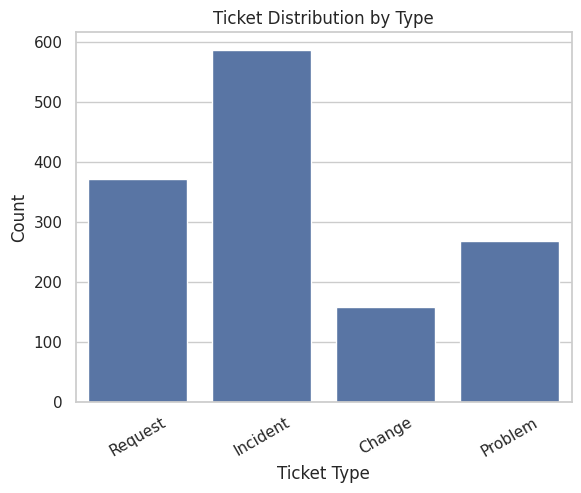

In [ ]:
plt.figure()
sns.countplot(data=df, x='type')
plt.title("Ticket Distribution by Type")
plt.xlabel("Ticket Type")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()


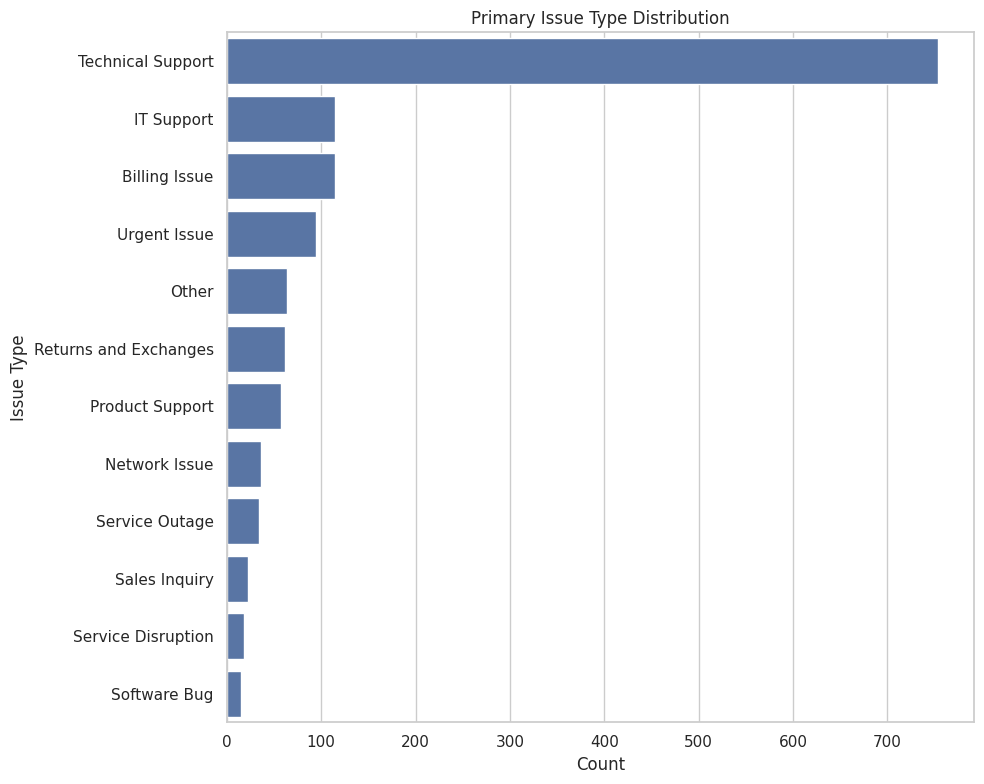

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(
    data=df,
    y='tag1_primary_issue_type',
    order=df['tag1_primary_issue_type'].value_counts().index
)
plt.title("Primary Issue Type Distribution")
plt.xlabel("Count")
plt.ylabel("Issue Type")
plt.tight_layout()
plt.show()


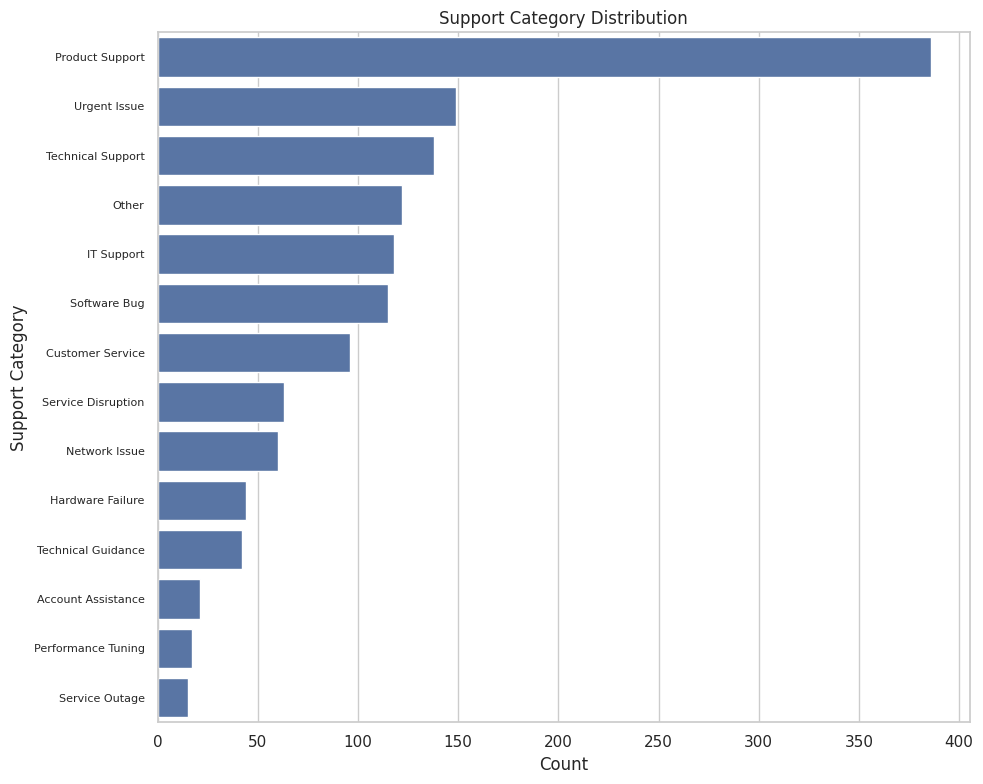

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(
    data=df,
    y='tag2_support_category',
    order=df['tag2_support_category'].value_counts().index
)
plt.title("Support Category Distribution")
plt.xlabel("Count")
plt.ylabel("Support Category")
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

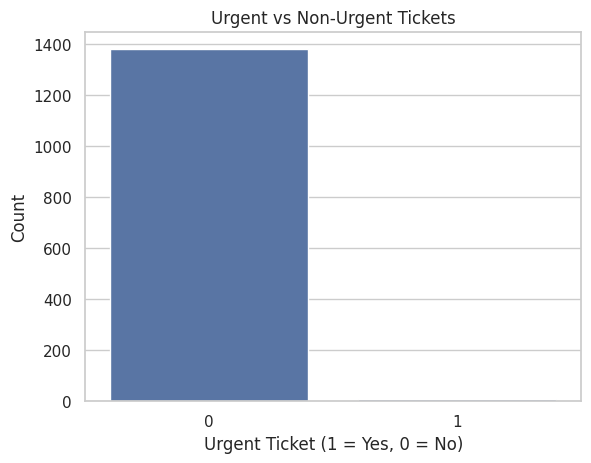

In [ ]:
plt.figure()
sns.countplot(data=df, x='is_urgent_ticket')
plt.title("Urgent vs Non-Urgent Tickets")
plt.xlabel("Urgent Ticket (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


In [ ]:
df[['body_length', 'is_high_detail_ticket']].head(10)

,body_length,is_high_detail_ticket
0,925,1
1,397,0
2,1262,1
3,850,1
4,692,1
5,629,1
6,629,1
7,588,0
8,466,0
9,399,0


In [ ]:
urgent_counts = df['is_urgent_ticket'].value_counts()

print("Urgent vs Not Urgent Ticket Count:")
print(urgent_counts)

Urgent vs Not Urgent Ticket Count:
is_urgent_ticket
0    1379
1       7
Name: count, dtype: int64


In [ ]:
def group_sparse_categories(df, column, threshold=15):
    counts = df[column].value_counts()
    sparse_categories = counts[counts < threshold].index
    df[column] = df[column].replace(sparse_categories, 'Other')
    return df

columns_to_group = [
    'type',
    'tag1_primary_issue_type',
    'tag2_support_category',
    'tag3_issue_nature',
    'tag4_technology_area',
    'tag5_resolution_type',
    'tag6_support_action',
    'tag7_performance_aspect',
    'tag8_urgency_level'
]

for col in columns_to_group:
    df = group_sparse_categories(df, col)

print("Sparse categories grouped into 'Other' for selected columns.")

print(f"\nValue counts for 'type' after grouping:")
print(df['type'].value_counts())

Sparse categories grouped into 'Other' for selected columns.

Value counts for 'type' after grouping:
type
Incident    587
Request     372
Problem     268
Change      159
Name: count, dtype: int64


In [ ]:
priority_counts = df['priority'].value_counts()
print(priority_counts)

priority
high      592
medium    555
low       239
Name: count, dtype: int64


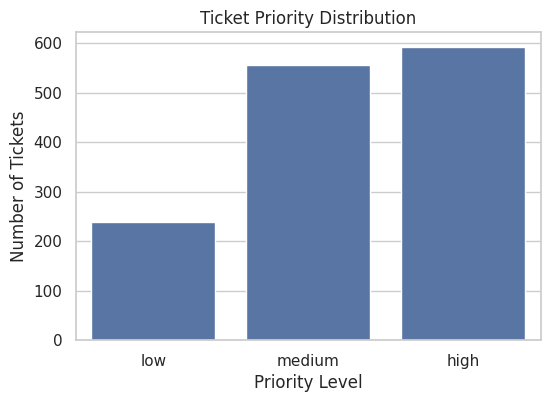

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(
    data=df,
    x='priority',
    order=['low', 'medium', 'high']
)

plt.title("Ticket Priority Distribution")
plt.xlabel("Priority Level")
plt.ylabel("Number of Tickets")
plt.show()

In [ ]:
df.to_csv('final_dataset_tickets_ready_for_eda.csv', index=False)
print("Dataset saved as 'final_dataset_tickets_ready_for_eda.csv'")

Dataset saved as 'final_dataset_tickets_ready_for_eda.csv'


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving processed_tickets_data .1 week 3.csv to processed_tickets_data .1 week 3.csv


In [ ]:
df = pd.read_csv("processed_tickets_data .1 week 3.csv")

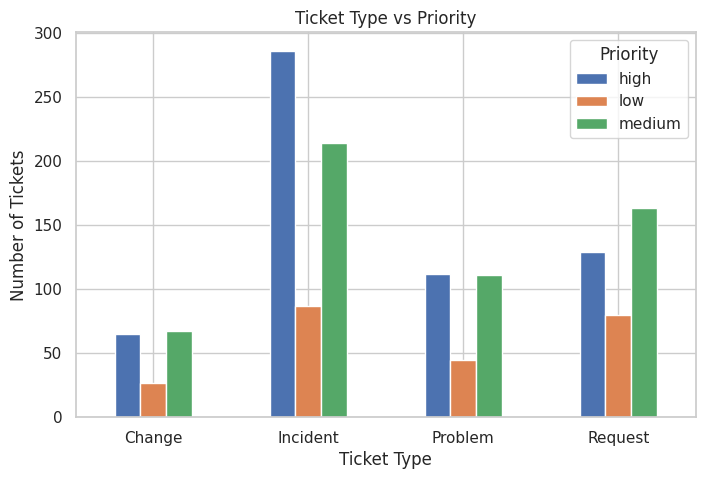

In [ ]:
type_priority_ct = pd.crosstab(df['type'], df['priority'])

type_priority_ct.plot(
    kind='bar',
    figsize=(8,5)
)

plt.title("Ticket Type vs Priority")
plt.xlabel("Ticket Type")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=0)
plt.legend(title="Priority")
plt.show()


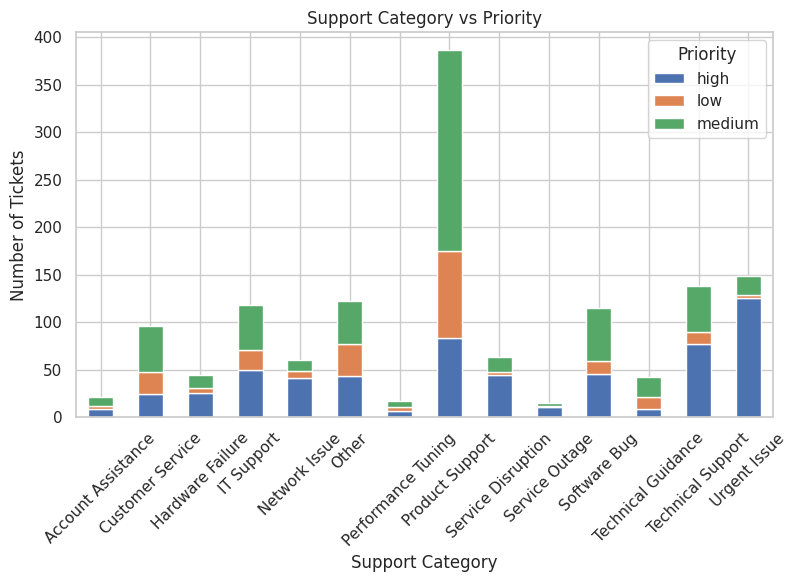

In [ ]:
support_priority_ct = pd.crosstab(df['tag2_support_category'], df['priority'])

support_priority_ct.plot(
    kind='bar',
    stacked=True,
    figsize=(9,5)
)

plt.title("Support Category vs Priority")
plt.xlabel("Support Category")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=45)
plt.legend(title="Priority")
plt.show()


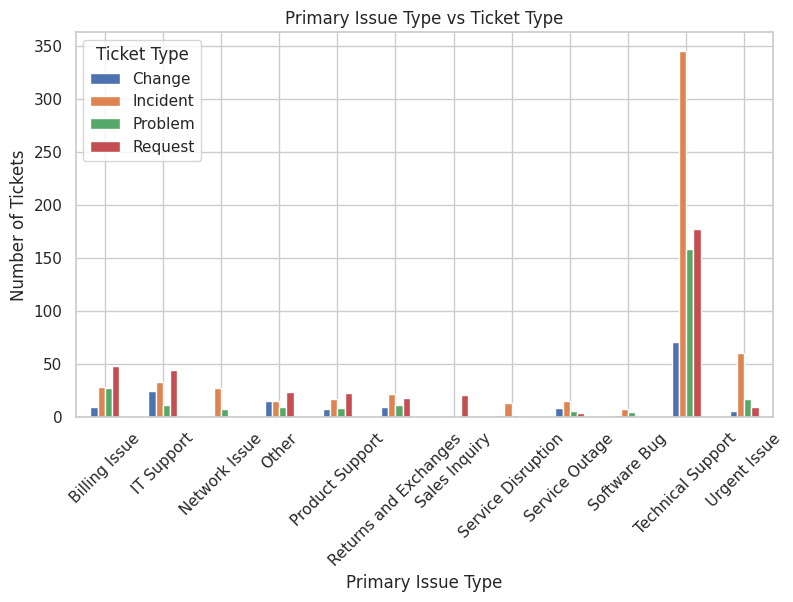

In [ ]:
issue_type_ct = pd.crosstab(
    df['tag1_primary_issue_type'],
    df['type']
)

issue_type_ct.plot(
    kind='bar',
    figsize=(9,5)
)

plt.title("Primary Issue Type vs Ticket Type")
plt.xlabel("Primary Issue Type")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=45)
plt.legend(title="Ticket Type")
plt.show()


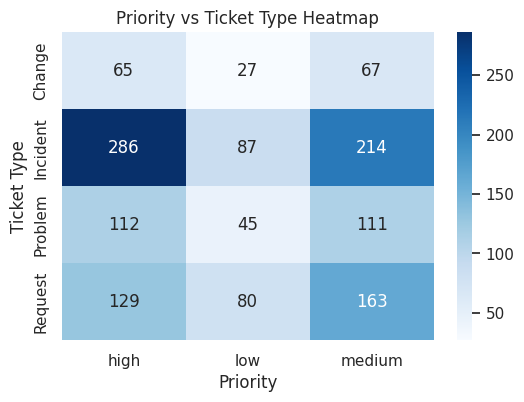

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(
    priority_type_ct,
    annot=True,
    fmt='d',
    cmap='Blues'
)

plt.title("Priority vs Ticket Type Heatmap")
plt.xlabel("Priority")
plt.ylabel("Ticket Type")
plt.show()


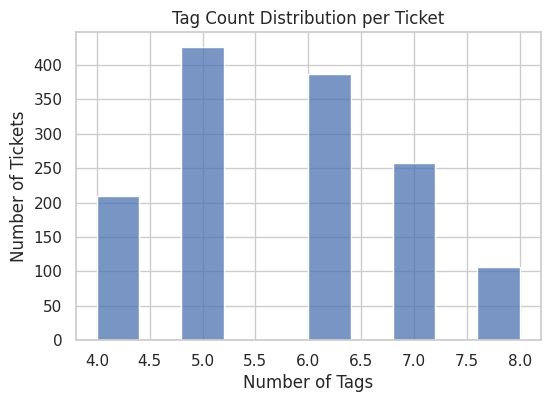

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(
    df['tag_count'],
    bins=10
)

plt.title("Tag Count Distribution per Ticket")
plt.xlabel("Number of Tags")
plt.ylabel("Number of Tickets")
plt.show()


In [ ]:
df.to_csv('processed_tickets_data.csv', index=False)
from google.colab import files

files.download('processed_tickets_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Module 4:- Similarity and Cluster Insights

Module 4:- Similarity and Cluster Insights
• Analyze average similarity scores within clusters
• Compare cluster size vs. issue type
• Visualize performance gaps using boxplots and scatter plots
• Deliverables: Minimum 8 visualizations, Summary of key patterns and problem clusters

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 3.2.csv to 3.2 (1).csv


In [ ]:
df = pd.read_csv("3.2.csv")

In [8]:
scaler = StandardScaler()

# Define the clustering_features
clustering_features = [
    'subject_length',
    'body_length',
    'tag_count',
    'is_urgent_ticket',
    'is_performance_issue',
    'is_software_issue',
    'is_hardware_issue',
    'is_high_detail_ticket'
]

# Define X using the DataFrame df and clustering_features
X = df[clustering_features]

X_scaled = scaler.fit_transform(X)

print("\nFeature scaling completed")
print("Scaled feature matrix shape:", X_scaled.shape)


Feature scaling completed
Scaled feature matrix shape: (1386, 8)


In [9]:
from sklearn.cluster import KMeans



Elbow method

In [10]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

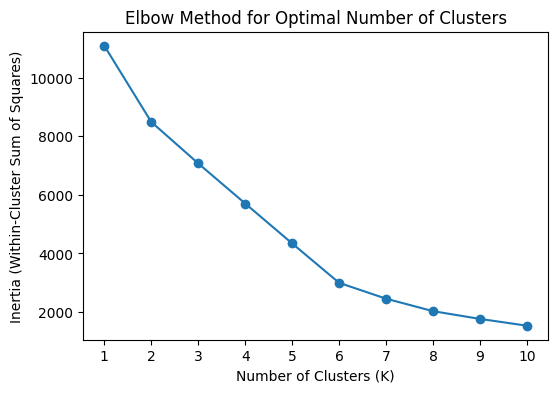

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')

plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.xticks(K_range)
plt.show()

In [12]:
kmeans = KMeans(
    n_clusters=6,
    random_state=42,
    n_init=10
)

df['cluster'] = kmeans.fit_predict(X_scaled)

print("Clustering completed successfully")


Clustering completed successfully


In [13]:
df['cluster'].value_counts().sort_index()

,count
cluster,
0,680
1,648
2,3
3,7
4,33
5,15


In [ ]:
df[['id', 'cluster'] + clustering_features].head()


,id,cluster,subject_length,body_length,tag_count,is_urgent_ticket,is_performance_issue,is_software_issue,is_hardware_issue,is_high_detail_ticket
0,0,4,39,925,7,0,1,0,0,1
1,1,0,46,397,5,0,0,0,0,0
2,2,3,54,1262,8,1,1,0,0,1
3,3,1,19,850,6,0,0,0,0,1
4,4,1,69,692,5,0,0,0,0,1


In [ ]:
cluster_profile = df.groupby('cluster')[
    [
        'subject_length',
        'body_length',
        'tag_count',
        'is_urgent_ticket',
        'is_performance_issue',
        'is_software_issue',
        'is_hardware_issue',
        'is_high_detail_ticket'
    ]
].mean()

cluster_profile


,subject_length,body_length,tag_count,is_urgent_ticket,is_performance_issue,is_software_issue,is_hardware_issue,is_high_detail_ticket
cluster,,,,,,,,
0,34.201471,323.958824,5.195588,0.0,0.000000,0.0,0.0,0.000000
1,38.949074,1042.936728,6.191358,0.0,0.000000,0.0,0.0,1.000000
2,19.000000,567.666667,4.666667,0.0,0.000000,0.0,1.0,0.333333
3,39.000000,961.714286,8.000000,1.0,0.142857,0.0,0.0,0.857143
4,45.030303,1022.606061,7.272727,0.0,1.000000,0.0,0.0,0.787879
5,30.933333,871.133333,5.733333,0.0,0.000000,1.0,0.0,0.600000


In [ ]:
cluster_flags = df.groupby('cluster')[
    ['is_urgent_ticket', 'is_performance_issue']
].mean()

cluster_flags


,is_urgent_ticket,is_performance_issue
cluster,,
0,0.0,0.000000
1,0.0,0.000000
2,0.0,0.000000
3,1.0,0.142857
4,0.0,1.000000
5,0.0,0.000000


In [ ]:
priority_cluster = pd.crosstab(df['cluster'], df['priority'])
priority_cluster

priority,high,low,medium
cluster,,,
0,285,130,265
1,272,105,271
2,3,0,0
3,3,1,3
4,20,2,11
5,9,1,5


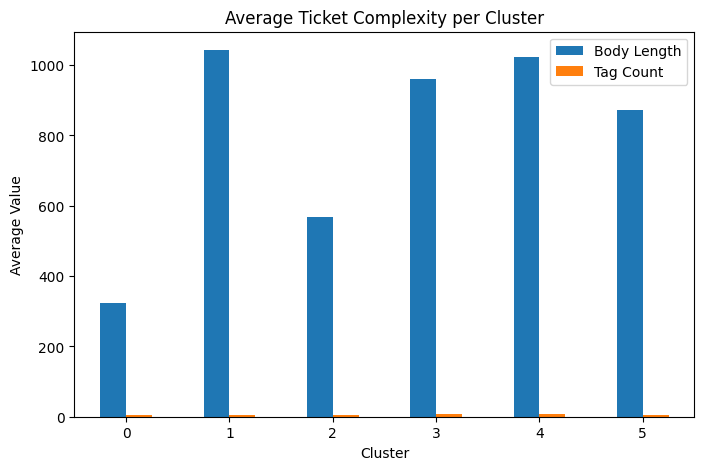

In [ ]:
cluster_complexity = cluster_profile[['body_length', 'tag_count']]

cluster_complexity.plot(
    kind='bar',
    figsize=(8,5)
)

plt.title("Average Ticket Complexity per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.legend(['Body Length', 'Tag Count'])
plt.show()

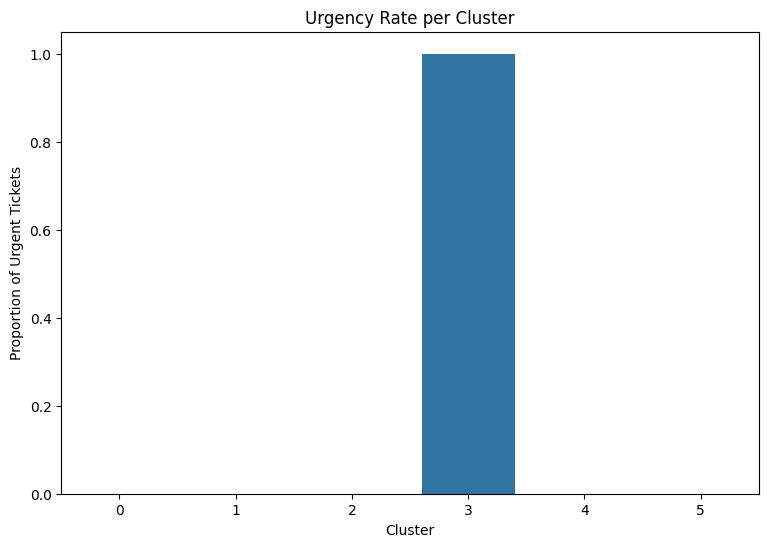

In [ ]:
plt.figure(figsize=(9,6))
sns.barplot(
    x=cluster_flags.index,
    y=cluster_flags['is_urgent_ticket']
)

plt.title("Urgency Rate per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Proportion of Urgent Tickets")
plt.show()


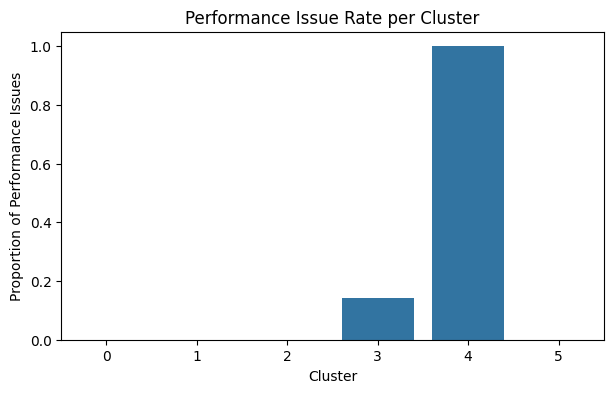

In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(
    x=cluster_flags.index,
    y=cluster_flags['is_performance_issue']
)

plt.title("Performance Issue Rate per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Proportion of Performance Issues")
plt.show()


Ticket Type Distribution per Cluster

In [ ]:
type_cluster = pd.crosstab(df['cluster'], df['type'])
type_cluster

type,Change,Incident,Problem,Request
cluster,,,,
0,73,289,126,192
1,79,269,132,168
2,0,1,1,1
3,1,2,2,2
4,4,18,2,9
5,2,8,5,0


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance by PCA components:", pca.explained_variance_ratio_)

Explained variance by PCA components: [0.28762167 0.13379674]


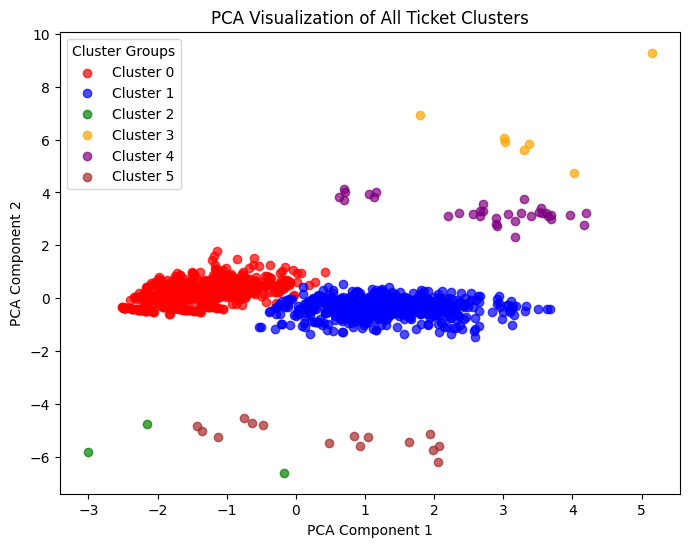

In [ ]:
cluster_colors = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'orange',
    4: 'purple',
    5: 'brown'
}

plt.figure(figsize=(8,6))

for cluster_id, color in cluster_colors.items():
    plt.scatter(
        X_pca[df['cluster'] == cluster_id, 0],
        X_pca[df['cluster'] == cluster_id, 1],
        c=color,
        label=f'Cluster {cluster_id}',
        alpha=0.7
    )

plt.title("PCA Visualization of All Ticket Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster Groups")
plt.show()

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving 3.csv.csv to 3.csv.csv


In [ ]:
df=pd.read_csv("3.csv.csv")

In [ ]:
n = len(df)

dates_2025 = pd.to_datetime(
    np.random.choice(
        pd.date_range("2025-01-01", "2025-12-31"),
        size=n
    )
)

df['ticket_raised_date'] = dates_2025

df[['ticket_raised_date']].head()


,ticket_raised_date
0,2025-02-21
1,2025-09-12
2,2025-08-20
3,2025-06-15
4,2025-02-15


In [ ]:
from datetime import timedelta

n = len(df)

df['ticket_raised_date'] = pd.to_datetime(
    np.random.choice(
        pd.date_range("2025-01-01", "2025-12-31"),
        size=n
    )
)

resolve_dates = []

for i in range(n):
    raised_date = df.loc[i, 'ticket_raised_date']

    if (i + 1) % 11 == 0:
        resolve_dates.append(pd.NaT)

    elif (i + 1) % 8 == 0:
        resolve_dates.append(raised_date + timedelta(days=15))

    elif (i + 1) % 5 == 0:
        days_to_add = np.random.randint(10, 13)
        resolve_dates.append(raised_date + timedelta(days=days_to_add))

    else:
        days_to_add = np.random.randint(1, 4)
        resolve_dates.append(raised_date + timedelta(days=days_to_add))

df['resolve_date'] = resolve_dates

df[['ticket_raised_date', 'resolve_date']].head(25)

,ticket_raised_date,resolve_date
0,2025-12-18,2025-12-19
1,2025-09-28,2025-09-29
2,2025-12-20,2025-12-23
3,2025-03-09,2025-03-11
4,2025-07-26,2025-08-07
5,2025-02-15,2025-02-18
6,2025-06-02,2025-06-04
7,2025-10-08,2025-10-23
8,2025-12-20,2025-12-23
9,2025-12-18,2025-12-29


In [ ]:
df.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag1_primary_issue_type,...,body_length,tag_count,is_urgent_ticket,is_performance_issue,is_software_issue,is_hardware_issue,is_high_detail_ticket,ticket_raised_date,resolve_date,resolution_time
0,0,urgent assistance required: aws service,"dear it services support team, i am reaching o...","dear <name>, thank you for reaching out regard...",Request,IT Support,high,en,IT Services,IT Support,...,925,7,0,1,0,0,1,2025-06-05,2025-06-06,3
1,1,urgent: issue with zoom screen sharing feature,"dear customer support, i am experiencing a hig...","dear <name>, thank you for reaching out. we un...",Incident,Technical Support,high,en,IT Services,Technical Support,...,397,5,0,0,0,0,0,2025-02-15,2025-02-17,2
2,2,service outage resolution requested for ongoin...,"dear it services customer support, i am writin...","dear <name>, thank you for reaching out to us ...",Change,Service Outages and Maintenance,high,en,IT Services,Service Outage,...,1262,8,1,1,0,0,1,2025-09-16,2025-09-17,1
3,3,surface pro 7 issue,"dear tech online store support team, i hope th...","dear <name>, thank you for reaching out to us ...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,...,850,6,0,0,0,0,1,2025-04-21,2025-04-24,2
4,4,request for software development consultation ...,"dear customer support, i hope this message fin...","dear <name>, thank you for reaching out regard...",Request,Technical Support,medium,en,IT Services,IT Support,...,692,5,0,0,0,0,1,2025-09-24,2025-10-05,12


Milestone 3: Week 5
Module 5:- Performance Trend Analysis
• Analyze average resolution times by priority and type
• Determine which countries or teams handle tickets fastest
• Identify high-priority unresolved issues

27/01/26 (Day 1 Task)

-Create a new column Resolution Time
-Calculate Average Resolution Time For entire dataset
-For each Ticket Type
-Create 1 or 2 bar charts showing Average Resolution Time by Ticket Type

In [ ]:
#Create a new column Resolution Time
df['resolution_time'] = (df['resolve_date'] - df['ticket_raised_date']).dt.days
df[['ticket_raised_date', 'resolve_date', 'resolution_time']].head(30)


,ticket_raised_date,resolve_date,resolution_time
0,2025-06-05,2025-06-06,1.0
1,2025-02-15,2025-02-17,2.0
2,2025-09-16,2025-09-17,1.0
3,2025-04-21,2025-04-24,3.0
4,2025-09-24,2025-10-05,11.0
5,2025-01-28,2025-01-30,2.0
6,2025-05-03,2025-05-06,3.0
7,2025-02-22,2025-03-09,15.0
8,2025-05-01,2025-05-03,2.0
9,2025-03-11,2025-03-23,12.0


In [ ]:
#Calculate Average Resolution Time For entire dataset
avg_resolution_time = df['resolution_time'].mean()

print(f"Average Resolution Time: {avg_resolution_time:.2f} days")

Average Resolution Time: 5.22 days


In [ ]:
df.groupby('priority')['resolution_time'].mean()

,resolution_time
priority,
high,5.256983
low,4.356481
medium,5.552268


In [ ]:
#-For each Ticket Type
avg_resolution_by_type = df.groupby('type')['resolution_time'].mean()

print("Average Resolution Time by Ticket Type (in days):")
print(avg_resolution_by_type)

Average Resolution Time by Ticket Type (in days):
type
Change      4.541096
Incident    5.304428
Problem     5.095041
Request     5.478788
Name: resolution_time, dtype: float64


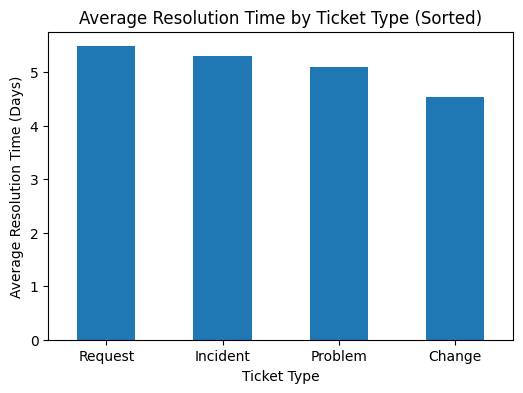

In [ ]:
avg_resolution_sorted = avg_resolution_by_type.sort_values(ascending=False)

plt.figure(figsize=(6,4))
avg_resolution_sorted.plot(kind='bar')

plt.title("Average Resolution Time by Ticket Type (Sorted)")
plt.xlabel("Ticket Type")
plt.ylabel("Average Resolution Time (Days)")
plt.xticks(rotation=0)
plt.show()


28/01/26 (Day 2 Task)  

Calculate Average Resolution Time by Priority (High, Medium, Low)
-Compare Resolution Time by Ticket Type (Request, Incident, Problem)
-Create visualizations:
-Bar chart: Priority vs Average Resolution Time
-Box plot or bar chart: Ticket Type vs Resolution Time
Advanced Insight:
-Analyze High-Priority tickets by Ticket Type
-Compare resolution time for High-Priority Requests vs Incidents vs Problems
-Create one additional bar chart showing Ticket Type vs Resolution Time for High Priority

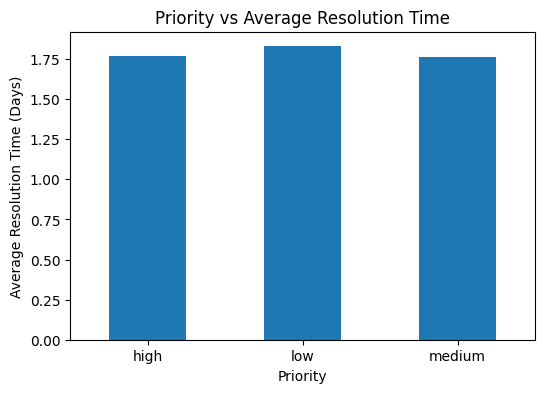

In [ ]:
plt.figure(figsize=(6,4))
avg_resolution_by_priority.plot(kind='bar')

plt.title("Priority vs Average Resolution Time")
plt.xlabel("Priority")
plt.ylabel("Average Resolution Time (Days)")
plt.xticks(rotation=0)
plt.show()


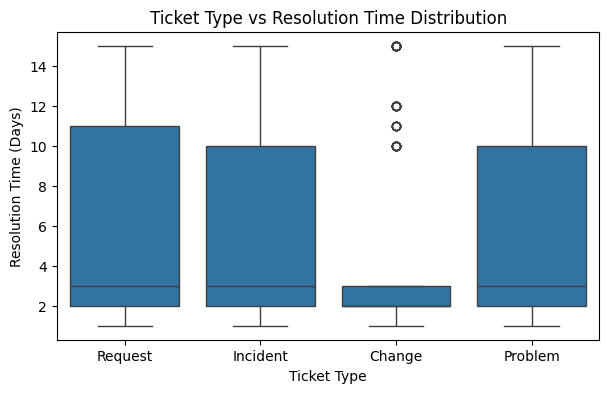

In [28]:
plt.figure(figsize=(7,4))
sns.boxplot(x='type', y='resolution_time', data=df)

plt.title("Ticket Type vs Resolution Time Distribution")
plt.xlabel("Ticket Type")
plt.ylabel("Resolution Time (Days)")
plt.show()

#The box plot shows that request tickets are resolved fastest, while incidents,
#problems, and some change tickets exhibit higher variability and longer
#resolution times due to increased complexity.”

In [29]:
high_priority_df = df[df['priority'].str.lower() == 'high']

print("High-Priority Tickets Count:", high_priority_df.shape[0])


High-Priority Tickets Count: 592


In [ ]:
high_priority_resolution_by_type = (
    high_priority_df.groupby('type')['resolution_time'].mean()
)

print("High-Priority Resolution Time by Ticket Type:")
print(high_priority_resolution_by_type)


High-Priority Resolution Time by Ticket Type:
type
Change      4.548387
Incident    5.503846
Problem     5.080000
Request     5.234783
Name: resolution_time, dtype: float64


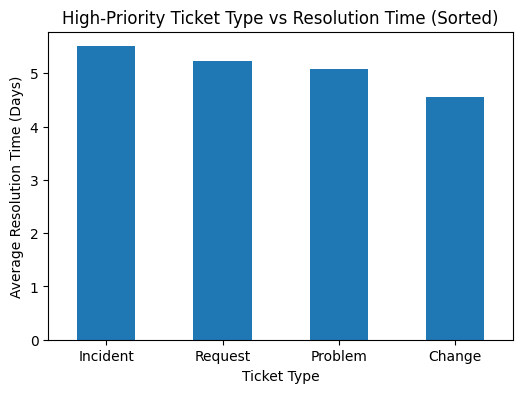

In [ ]:
high_priority_resolution_by_type_sorted = (
    high_priority_resolution_by_type.sort_values(ascending=False)
)

plt.figure(figsize=(6,4))
high_priority_resolution_by_type_sorted.plot(kind='bar')

plt.title("High-Priority Ticket Type vs Resolution Time (Sorted)")
plt.xlabel("Ticket Type")
plt.ylabel("Average Resolution Time (Days)")
plt.xticks(rotation=0)
plt.show()


29/01/26  (Day 3 Task)
-Identify unresolved tickets (tickets with missing Resolved Date)
-Filter unresolved High-Priority tickets
-Analyze resolution time trend over time (weekly or monthly)
Create visualizations:
-Bar chart: Unresolved tickets by priority
-Line chart: Average resolution time over time

In [ ]:
unresolved_tickets = df[df['resolve_date'].isna()]

print("Total Unresolved Tickets:", unresolved_tickets.shape[0])

Total Unresolved Tickets: 126


In [ ]:
unresolved_high_priority = unresolved_tickets[
    unresolved_tickets['priority'].str.lower() == 'high'
]

print("Unresolved High-Priority Tickets:",
      unresolved_high_priority.shape[0])

Unresolved High-Priority Tickets: 55


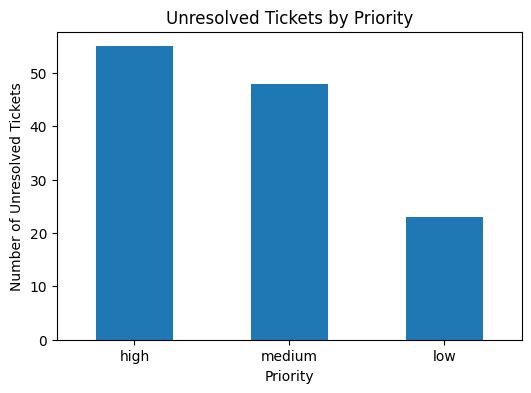

In [32]:
unresolved_tickets = df[df['resolve_date'].isna()]
unresolved_by_priority = (
    unresolved_tickets['priority']
    .value_counts()
)

plt.figure(figsize=(6,4))
unresolved_by_priority.plot(kind='bar')

plt.title("Unresolved Tickets by Priority")
plt.xlabel("Priority")
plt.ylabel("Number of Unresolved Tickets")
plt.xticks(rotation=0)
plt.show()

#High-priority tickets have the highest number of unresolved cases.

In [ ]:
unresolved_tickets = df[df['resolve_date'].isna()]

unresolved_by_priority = unresolved_tickets['priority'].value_counts()

print("Unresolved tickets by priority:")
print(unresolved_by_priority)

Unresolved tickets by priority:
priority
high      55
medium    48
low       23
Name: count, dtype: int64


In [ ]:
#Create Month Column
df['month'] = df['ticket_raised_date'].dt.to_period('M')

In [ ]:
monthly_resolution_trend = (
    df.dropna(subset=['resolution_time'])
      .groupby('month')['resolution_time']
      .mean()
)

print(monthly_resolution_trend)


month
2025-01    5.945055
2025-02    5.163043
2025-03    5.774194
2025-04    5.417476
2025-05    5.536082
2025-06    5.347826
2025-07    5.043478
2025-08    5.371681
2025-09    4.360000
2025-10    4.732143
2025-11    4.614583
2025-12    5.303922
Freq: M, Name: resolution_time, dtype: float64


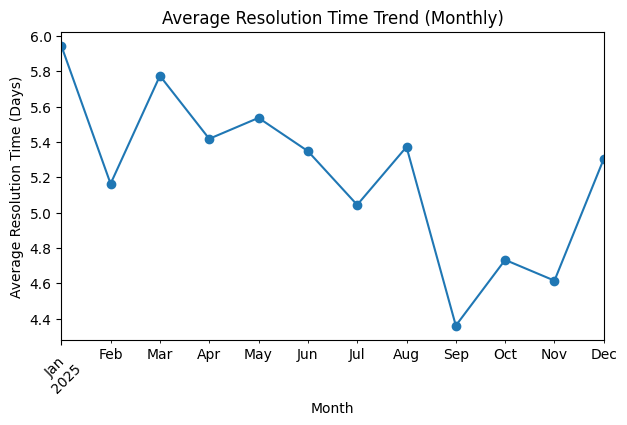

In [ ]:
plt.figure(figsize=(7,4))
monthly_resolution_trend.plot(marker='o')

plt.title("Average Resolution Time Trend (Monthly)")
plt.xlabel("Month")
plt.ylabel("Average Resolution Time (Days)")
plt.xticks(rotation=45)
plt.show()


30/01/26  (Day 4 Task)
Compare Average Resolution Time across:
Countries or Regions
Issue Categories or Ticket Types
Perform comparison specifically for High-Priority tickets
Identify performance gaps, focusing on:
Regions with slower resolution times
Categories where high-priority tickets are delayed
Create visualizations:
Comparative bar chart for overall performance
Comparative chart for high-priority tickets

In [ ]:
country_region_map = {
    "India": [
        "Bangalore", "Hyderabad", "Pune", "Chennai",
        "Mumbai", "Noida", "Gurgaon", "Kolkata"
    ],
    "United States": [
        "California", "Texas", "New York", "Washington"
    ],
    "United Kingdom": [
        "London", "Manchester"
    ],
    "Germany": [
        "Berlin", "Munich"
    ],
    "Canada": [
        "Toronto", "Vancouver"
    ],
    "Australia": [
        "Sydney"
    ],
    "Singapore": [
        "Singapore"
    ]
}


country_choices = list(country_region_map.keys())
proportions = [
    0.40,
    0.20,
    0.10,
    0.08,
    0.07,
    0.05,
    0.05
]


proportions[0] += (1.0 - sum(proportions))

countries = np.random.choice(country_choices, size=len(df), p=proportions)

df['country'] = countries


def assign_region(country):
    return np.random.choice(country_region_map[country])

df['region'] = df['country'].apply(assign_region)


print("Country Distribution:")
print(df['country'].value_counts())

print("\nSample Country–Region Mapping:")
df[['country', 'region']].head(15)

Country Distribution:
country
India             611
United States     291
United Kingdom    143
Germany           118
Canada             96
Australia          65
Singapore          62
Name: count, dtype: int64

Sample Country–Region Mapping:


,country,region
0,Germany,Munich
1,United States,California
2,United Kingdom,Manchester
3,Germany,Berlin
4,India,Bangalore
5,India,Bangalore
6,India,Noida
7,India,Gurgaon
8,Germany,Berlin
9,India,Hyderabad


In [ ]:
avg_resolution_by_country = (
    df.groupby('country')['resolution_time']
      .mean()
      .sort_values(ascending=False)
)

print("Average Resolution Time by Country:")
print(avg_resolution_by_country)


Average Resolution Time by Country:
country
Australia         5.966667
Canada            5.901099
India             5.370504
Singapore         5.052632
United States     5.003817
Germany           4.864078
United Kingdom    4.564885
Name: resolution_time, dtype: float64


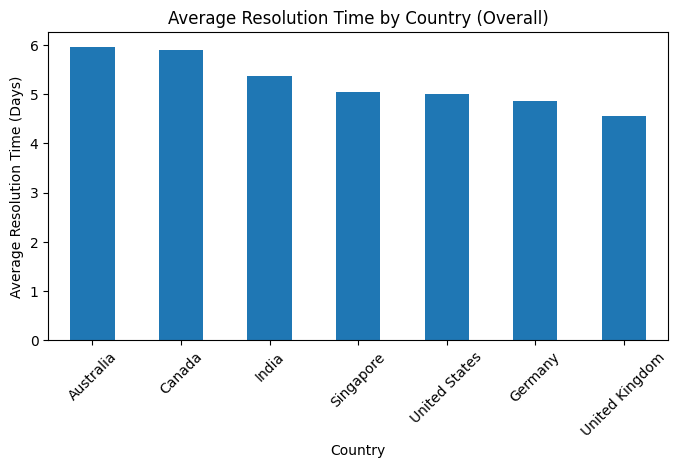

In [ ]:
plt.figure(figsize=(8,4))
avg_resolution_by_country.plot(kind='bar')

plt.title("Average Resolution Time by Country (Overall)")
plt.xlabel("Country")
plt.ylabel("Average Resolution Time (Days)")
plt.xticks(rotation=45)
plt.show()


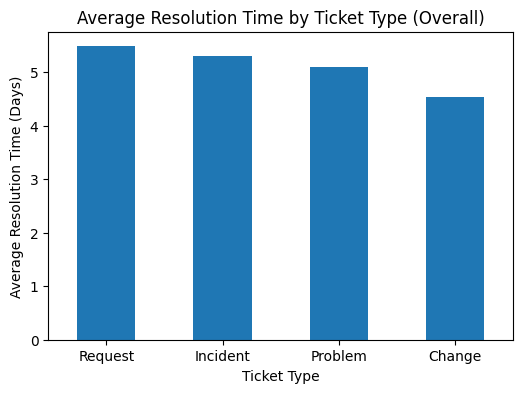

In [ ]:
plt.figure(figsize=(6,4))
avg_resolution_by_type.plot(kind='bar')

plt.title("Average Resolution Time by Ticket Type (Overall)")
plt.xlabel("Ticket Type")
plt.ylabel("Average Resolution Time (Days)")
plt.xticks(rotation=0)
plt.show()


In [ ]:
high_priority_country_perf = (
    high_priority_df.groupby('country')['resolution_time']
      .mean()
      .sort_values(ascending=False)
)

print("High-Priority Resolution Time by Country:")
print(high_priority_country_perf)


High-Priority Resolution Time by Country:
country
Canada            6.480000
Australia         6.363636
India             5.447154
United Kingdom    5.307692
United States     5.000000
Singapore         4.800000
Germany           3.809524
Name: resolution_time, dtype: float64


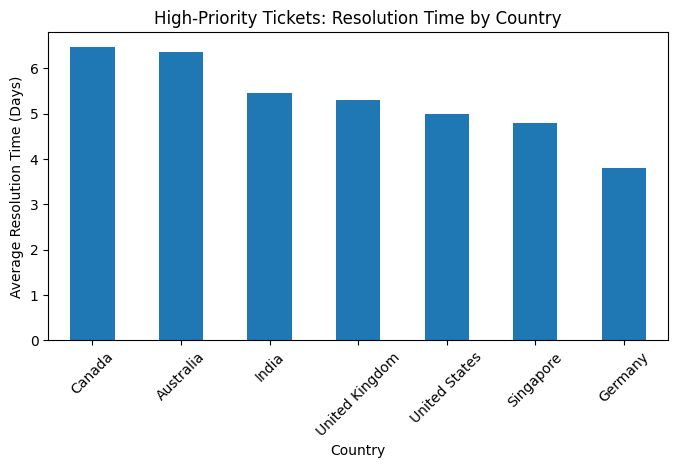

In [ ]:
plt.figure(figsize=(8,4))
high_priority_country_perf.plot(kind='bar')

plt.title("High-Priority Tickets: Resolution Time by Country")
plt.xlabel("Country")
plt.ylabel("Average Resolution Time (Days)")
plt.xticks(rotation=45)
plt.show()


In [ ]:
avg_resolution_by_region = (
    df.groupby('region')['resolution_time']
      .mean()
      .sort_values(ascending=False)
)

print("Average Resolution Time by Region:")
print(avg_resolution_by_region)


Average Resolution Time by Region:
region
Kolkata       6.304878
Vancouver     6.095238
Chennai       5.970588
Sydney        5.966667
Gurgaon       5.902778
California    5.896104
Mumbai        5.895522
Toronto       5.734694
Pune          5.516667
Berlin        5.255319
Washington    5.171429
Singapore     5.052632
Noida         4.840580
New York      4.793103
London        4.730159
Munich        4.535714
Manchester    4.411765
Bangalore     4.295082
Hyderabad     4.103896
Texas         3.807018
Name: resolution_time, dtype: float64


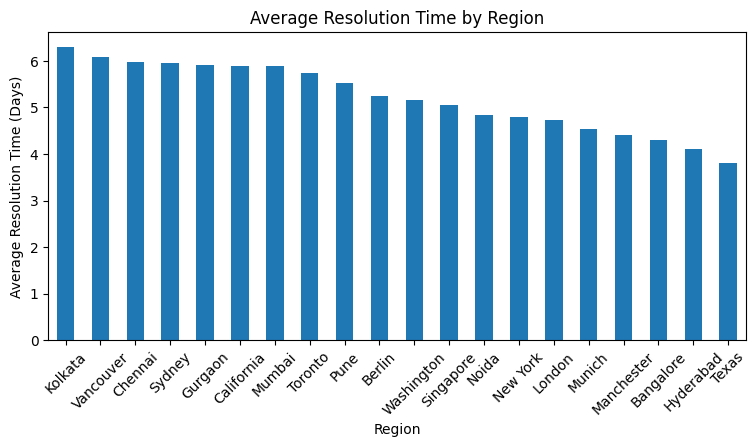

In [ ]:
plt.figure(figsize=(9,4))
avg_resolution_by_region.plot(kind='bar')

plt.title("Average Resolution Time by Region")
plt.xlabel("Region")
plt.ylabel("Average Resolution Time (Days)")
plt.xticks(rotation=45)
plt.show()

#Kolkata, Vancouver, Chennai, Sydney, and Gurgaon show the slowest resolution times,
#while Texas, Hyderabad, Bangalore, Manchester, and Munich are the fastest-performing regions.

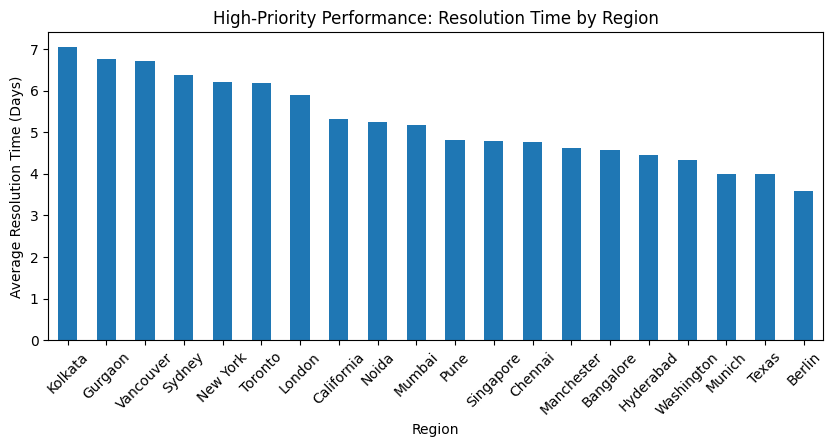

In [ ]:
high_priority_region_perf = (
    high_priority_df.groupby('region')['resolution_time']
      .mean()
      .sort_values(ascending=False)
)

plt.figure(figsize=(10,4))
high_priority_region_perf.plot(kind='bar')

plt.title("High-Priority Performance: Resolution Time by Region")
plt.xlabel("Region")
plt.ylabel("Average Resolution Time (Days)")
plt.xticks(rotation=45)
plt.show()

#High-priority tickets take longest to resolve in Kolkata, Gurgaon, Vancouver, and Sydney,
#while Berlin, Texas, Munich, and Washington handle high-priority issues the fastest.

In [ ]:
issue_by_country = pd.crosstab(
    df['country'],
    df['tag1_primary_issue_type']
)

print(issue_by_country)

tag1_primary_issue_type  Billing Issue  IT Support  Network Issue  Other  \
country                                                                    
Australia                            4           8              1      3   
Canada                               6          11              2      4   
Germany                              7          10              5     10   
India                               54          65             13     18   
Singapore                            7           5              2      2   
United Kingdom                      16           4              3      8   
United States                       21          12             10     19   

tag1_primary_issue_type  Product Support  Returns and Exchanges  \
country                                                           
Australia                              6                      3   
Canada                                 4                      6   
Germany                                2       

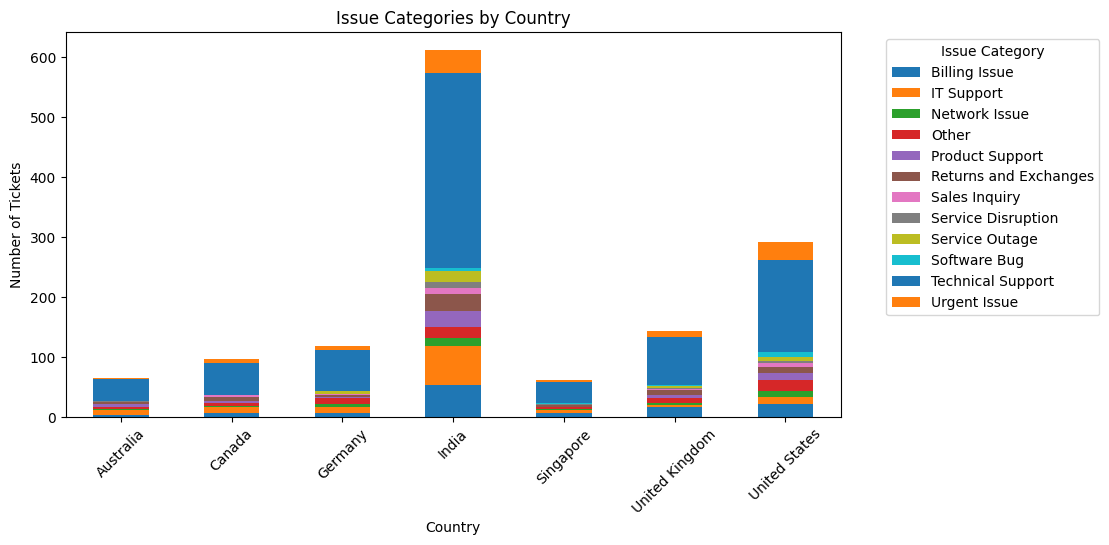

In [ ]:
issue_by_country.plot(
    kind='bar',
    stacked=True,
    figsize=(10,5)
)

plt.title("Issue Categories by Country")
plt.xlabel("Country")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=45)
plt.legend(title="Issue Category", bbox_to_anchor=(1.05, 1))
plt.show()

#India and the United States dominate ticket volume across all issue categories—especially
#Technical Support—while other countries show lower, more evenly distributed support demand.

In [ ]:
dominant_issue_country = (
    issue_by_country.idxmax(axis=1)
)

dominant_issue_country

,0
country,
Australia,Technical Support
Canada,Technical Support
Germany,Technical Support
India,Technical Support
Singapore,Technical Support
United Kingdom,Technical Support
United States,Technical Support


In [ ]:
#High-Priority Resolution Time by Ticket Type
high_priority_type_perf = (
    high_priority_df.groupby('type')['resolution_time']
      .mean()
      .sort_values(ascending=False)
)

print("High-Priority Resolution Time by Ticket Type:")
print(high_priority_type_perf)

High-Priority Resolution Time by Ticket Type:
type
Incident    5.503846
Request     5.234783
Problem     5.080000
Change      4.548387
Name: resolution_time, dtype: float64


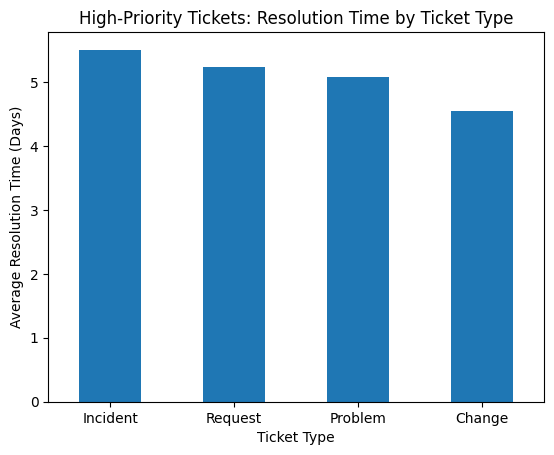

In [ ]:
#High-Priority Performance by Ticket Type
high_priority_type_perf.plot(kind='bar')

plt.title("High-Priority Tickets: Resolution Time by Ticket Type")
plt.xlabel("Ticket Type")
plt.ylabel("Average Resolution Time (Days)")
plt.xticks(rotation=0)
plt.show()

In [ ]:
performance_gaps = pd.DataFrame({
    "Overall Avg (Days)": avg_resolution_by_type,
    "High Priority Avg (Days)": high_priority_type_perf
})

performance_gaps['Performance Gap (Days)'] = (
    performance_gaps['High Priority Avg (Days)'] -
    performance_gaps['Overall Avg (Days)']
)

performance_gaps

,Overall Avg (Days),High Priority Avg (Days),Performance Gap (Days)
type,,,
Change,4.541096,4.548387,0.007291
Incident,5.304428,5.503846,0.199418
Problem,5.095041,5.080000,-0.015041
Request,5.478788,5.234783,-0.244005


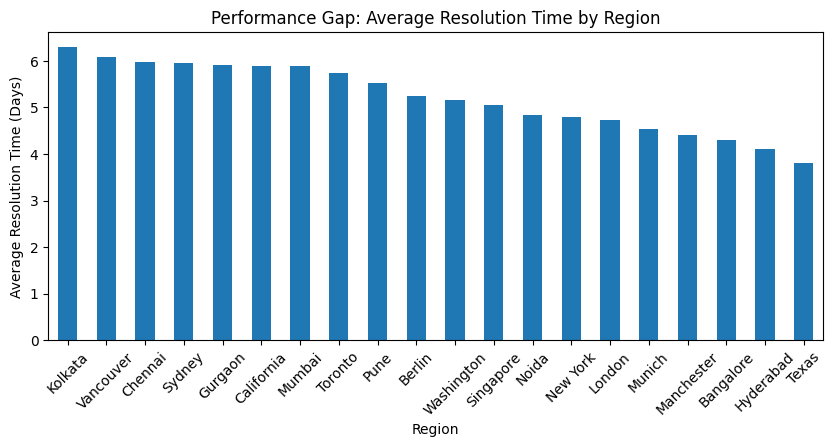

In [ ]:
plt.figure(figsize=(10,4))
avg_resolution_by_region.plot(kind='bar')

plt.title("Performance Gap: Average Resolution Time by Region")
plt.xlabel("Region")
plt.ylabel("Average Resolution Time (Days)")
plt.xticks(rotation=45)
plt.show()

#Kolkata, Vancouver, Chennai, and Sydney show the largest performance gaps with the highest average
#resolution times, while Texas, Hyderabad, and Bangalore demonstrate the most efficient ticket resolution.

In [ ]:
high_priority_df = df[
    (df['priority'].str.lower() == 'high') &
    (df['resolution_time'].notna())
]

In [ ]:
high_priority_category_delay = (
    high_priority_df.groupby('tag1_primary_issue_type')['resolution_time']
      .mean()
      .sort_values(ascending=False)
)

print("High-Priority Resolution Time by Issue Category:")
print(high_priority_category_delay)

High-Priority Resolution Time by Issue Category:
tag1_primary_issue_type
Software Bug             8.444444
Returns and Exchanges    6.428571
Service Outage           5.800000
Billing Issue            5.657143
Product Support          5.619048
IT Support               5.440000
Technical Support        5.435606
Urgent Issue             4.643836
Network Issue            4.562500
Service Disruption       3.666667
Other                    3.125000
Sales Inquiry            3.000000
Name: resolution_time, dtype: float64


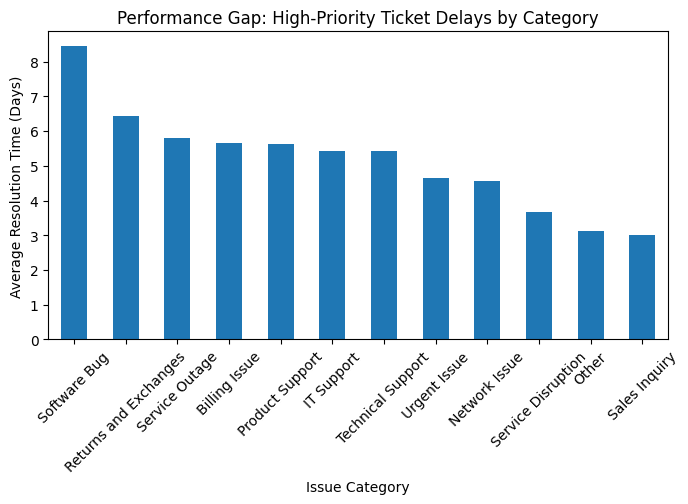

In [ ]:
plt.figure(figsize=(8,4))
high_priority_category_delay.plot(kind='bar')

plt.title("Performance Gap: High-Priority Ticket Delays by Category")
plt.xlabel("Issue Category")
plt.ylabel("Average Resolution Time (Days)")
plt.xticks(rotation=45)
plt.show()

#High-priority Software Bug, Returns & Exchanges, and Service Outage tickets experience
#the longest delays, while Sales Inquiry and Service Disruption are resolved the fastest.

In [ ]:
df.to_csv('processed_tickets_data.csv', index=False)
from google.colab import files
files.download('processed_tickets_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

02/02/26  (Day 1 Task, Module - 6)
Geographic Ticket Concentration
Identify geographic dimensions in the dataset:
Country
Region
Latitude
Longitude
Calculate ticket count by region or country
Create visualizations:
Heatmap showing ticket concentration by region
Bar chart showing ticket count by region
Analyze:
Regions with highest and lowest ticket volume
Possible operational reasons for high concentration
Submission
Heatmap and bar chart
Geographic insight summary

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 3.1.csv to 3.1.csv


In [ ]:
df=pd.read_csv('3.1.csv')

In [ ]:
df.head(1)

,id,subject,body,answer,type,queue,priority,language,business_type,tag1_primary_issue_type,...,is_performance_issue,is_software_issue,is_hardware_issue,is_high_detail_ticket,ticket_raised_date,resolve_date,resolution_time,month,country,region
0,0,urgent assistance required: aws service,"dear it services support team, i am reaching o...","dear <name>, thank you for reaching out regard...",Request,IT Support,high,en,IT Services,IT Support,...,1,0,0,1,2025-12-18,2025-12-19,1.0,2025-06,Germany,Munich


In [ ]:
region_coordinates = {
    "Bangalore": (12.97, 77.59),
    "Hyderabad": (17.38, 78.48),
    "Pune": (18.52, 73.85),
    "Chennai": (13.08, 80.27),
    "Mumbai": (19.07, 72.87),
    "Noida": (28.53, 77.39),
    "Gurgaon": (28.46, 77.03),
    "Kolkata": (22.57, 88.36),

    "California": (36.77, -119.41),
    "Texas": (31.96, -99.90),
    "New York": (40.71, -74.00),
    "Washington": (47.75, -120.74),

    "London": (51.50, -0.12),
    "Manchester": (53.48, -2.24),

    "Berlin": (52.52, 13.40),
    "Munich": (48.13, 11.58),

    "Toronto": (43.65, -79.38),
    "Vancouver": (49.28, -123.12),

    "Sydney": (-33.86, 151.21),
    "Singapore": (1.35, 103.82)
}

# Add latitude and longitude columns
df['latitude'] = df['region'].map(lambda x: region_coordinates[x][0])
df['longitude'] = df['region'].map(lambda x: region_coordinates[x][1])

df[['region', 'latitude', 'longitude']].head()

,region,latitude,longitude
0,Munich,48.13,11.58
1,California,36.77,-119.41
2,Manchester,53.48,-2.24
3,Berlin,52.52,13.40
4,Bangalore,12.97,77.59


In [ ]:
df[['region', 'latitude', 'longitude']].head(35)

,region,latitude,longitude
0,Munich,48.13,11.58
1,California,36.77,-119.41
2,Manchester,53.48,-2.24
3,Berlin,52.52,13.40
4,Bangalore,12.97,77.59
5,Bangalore,12.97,77.59
6,Noida,28.53,77.39
7,Gurgaon,28.46,77.03
8,Berlin,52.52,13.40
9,Hyderabad,17.38,78.48


In [ ]:
ticket_count_by_region = (
    df.groupby('region')
      .size()
      .sort_values(ascending=False)
)

print("Ticket Count by Region:")
print(ticket_count_by_region)

Ticket Count by Region:
region
Kolkata       93
Gurgaon       84
California    82
Hyderabad     81
Chennai       76
Washington    76
Manchester    74
Noida         73
Mumbai        71
Texas         70
London        69
Bangalore     68
Sydney        65
Pune          65
New York      63
Munich        62
Singapore     62
Berlin        56
Toronto       53
Vancouver     43
dtype: int64


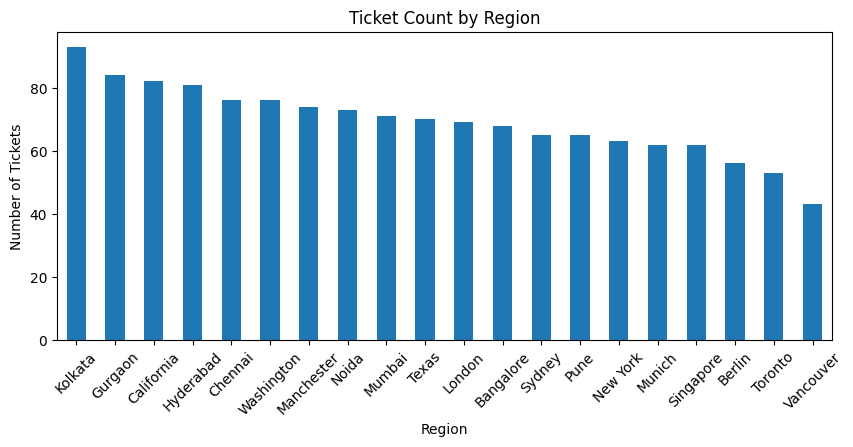

In [ ]:
plt.figure(figsize=(10,4))
ticket_count_by_region.plot(kind='bar')

plt.title("Ticket Count by Region")
plt.xlabel("Region")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=45)
plt.show()


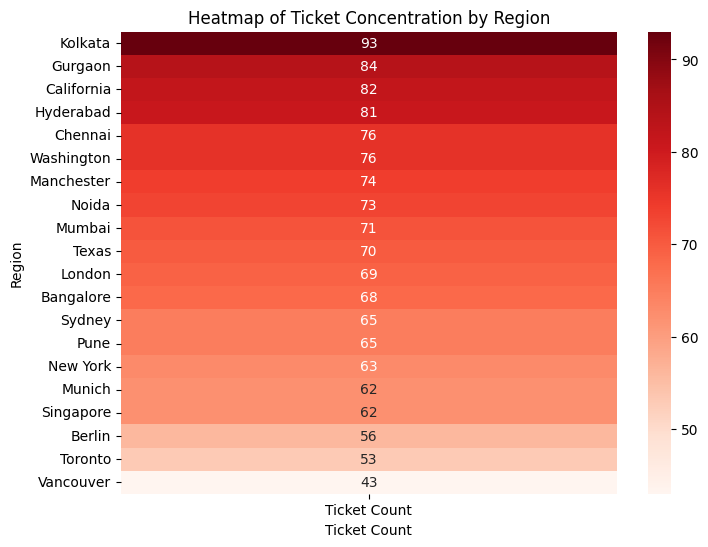

In [ ]:
# Prepare data for heatmap
heatmap_data = ticket_count_by_region.to_frame(name="Ticket Count")

plt.figure(figsize=(8,6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt="d",
    cmap="Reds"
)

plt.title("Heatmap of Ticket Concentration by Region")
plt.ylabel("Region")
plt.xlabel("Ticket Count")
plt.show()

# The heatmap shows ticket demand is heavily concentrated in Kolkata, Gurgaon,
#California, and Hyderabad, while Vancouver, Toronto, and Berlin experience
#the lowest support workload.


In [ ]:
print("Regions with Highest Ticket Volume:")
print(ticket_count_by_region.head(5))

print("\nRegions with Lowest Ticket Volume:")
print(ticket_count_by_region.tail(5))

Regions with Highest Ticket Volume:
region
Kolkata       93
Gurgaon       84
California    82
Hyderabad     81
Chennai       76
dtype: int64

Regions with Lowest Ticket Volume:
region
Munich       62
Singapore    62
Berlin       56
Toronto      53
Vancouver    43
dtype: int64


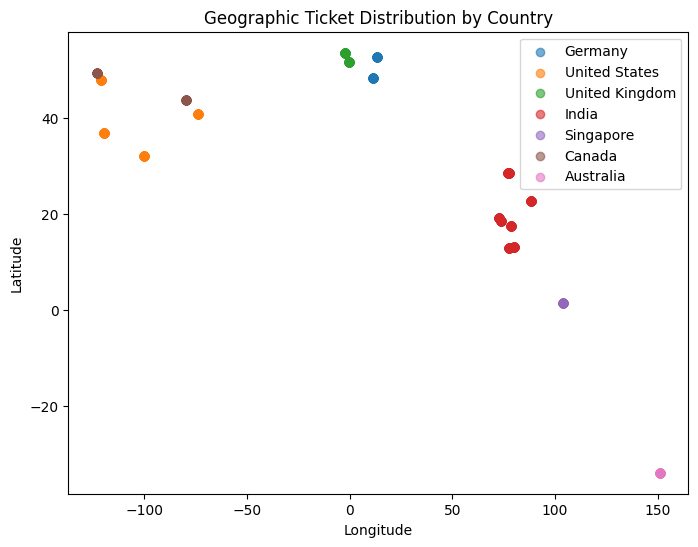

In [ ]:
plt.figure(figsize=(8,6))

countries = df['country'].unique()

for country in countries:
    subset = df[df['country'] == country]
    plt.scatter(
        subset['longitude'],
        subset['latitude'],
        label=country,
        alpha=0.6
    )

plt.title("Geographic Ticket Distribution by Country")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()


In [ ]:
df.to_csv('3.1.csv', index=False)
from google.colab import files
files.download('3.1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Geographic Ticket Concentration – Key Insights

☆ Kolkata, Gurgaon, Hyderabad, and Chennai show the highest ticket volumes, indicating heavy IT operations and higher user activity.

☆ California is the leading non-Indian region due to large-scale enterprise IT usage.

☆ Vancouver, Toronto, and Berlin have the lowest ticket volumes, suggesting smaller operations or more stable infrastructure.

☆ Ticket demand is unevenly distributed across regions, highlighting the need for region-specific resource allocation.

03/02/26  (Day 2 Task, Module - 6)

Category-Level Geographic Analysis
Identify issue categories in the dataset
Calculate ticket count by issue category for each region
Use latitude and longitude to map issue categories geographically
Create visualizations:
Geo-map or scatter map of issue categories by location
Comparative chart of issue categories across regions
Analyze:
Dominant issue categories per region
Regional patterns in issue types
Submission
Geo-visualization and comparative chart
Category-level geographic insights

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving 3.2.csv to 3.2.csv


In [ ]:
df=pd.read_csv('3.2.csv')

In [ ]:
df.head(1)

,id,subject,body,answer,type,queue,priority,language,business_type,tag1_primary_issue_type,...,is_hardware_issue,is_high_detail_ticket,ticket_raised_date,resolve_date,resolution_time,month,country,region,latitude,longitude
0,0,urgent assistance required: aws service,"dear it services support team, i am reaching o...","dear <name>, thank you for reaching out regard...",Request,IT Support,high,en,IT Services,IT Support,...,0,1,2025-12-18,2025-12-19,1.0,2025-06,Germany,Munich,48.13,11.58


In [ ]:
issue_categories = df['tag1_primary_issue_type'].unique()

print("Issue Categories:")
print(issue_categories)


Issue Categories:
['IT Support' 'Technical Support' 'Service Outage' 'Network Issue'
 'Billing Issue' 'Urgent Issue' 'Software Bug' 'Product Support'
 'Sales Inquiry' 'Returns and Exchanges' 'Other' 'Service Disruption']


In [ ]:
issue_by_region = pd.crosstab(
    df['region'],
    df['tag1_primary_issue_type']
)

issue_by_region_sorted = issue_by_region.loc[
    issue_by_region.sum(axis=1).sort_values(ascending=False).index
]

print(issue_by_region_sorted)



tag1_primary_issue_type  Billing Issue  IT Support  Network Issue  Other  \
region                                                                     
Kolkata                             11           7              1      2   
Gurgaon                             10           4              1      2   
California                          10           5              1      7   
Hyderabad                            8           6              3      2   
Chennai                              6          11              4      1   
Washington                           9           2              3      4   
Manchester                           4           2              0      7   
Noida                                9           6              2      3   
Mumbai                               3          10              0      3   
Texas                                1           2              2      5   
London                              12           2              3      1   
Bangalore   

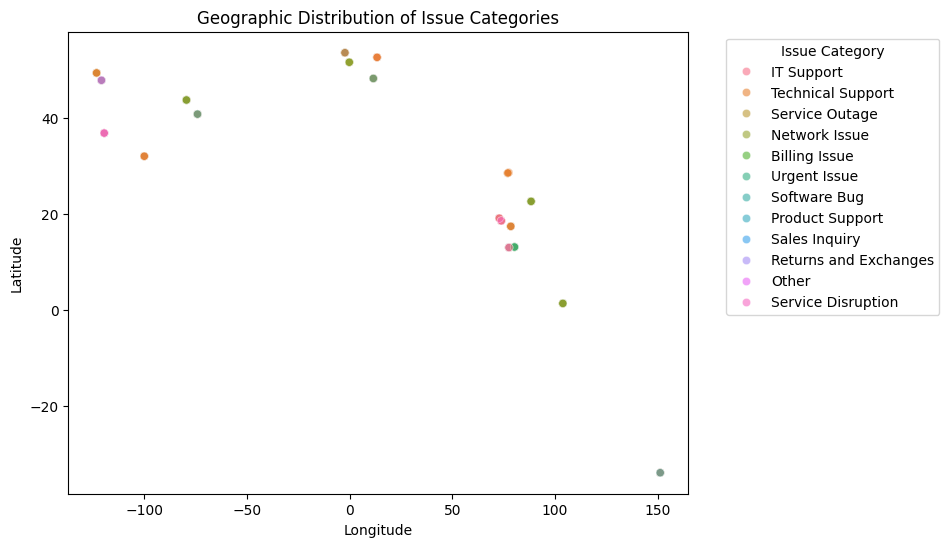

In [ ]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    data=df,
    x='longitude',
    y='latitude',
    hue='tag1_primary_issue_type',
    alpha=0.6
)

plt.title("Geographic Distribution of Issue Categories")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Issue Category", bbox_to_anchor=(1.05, 1))
plt.show()


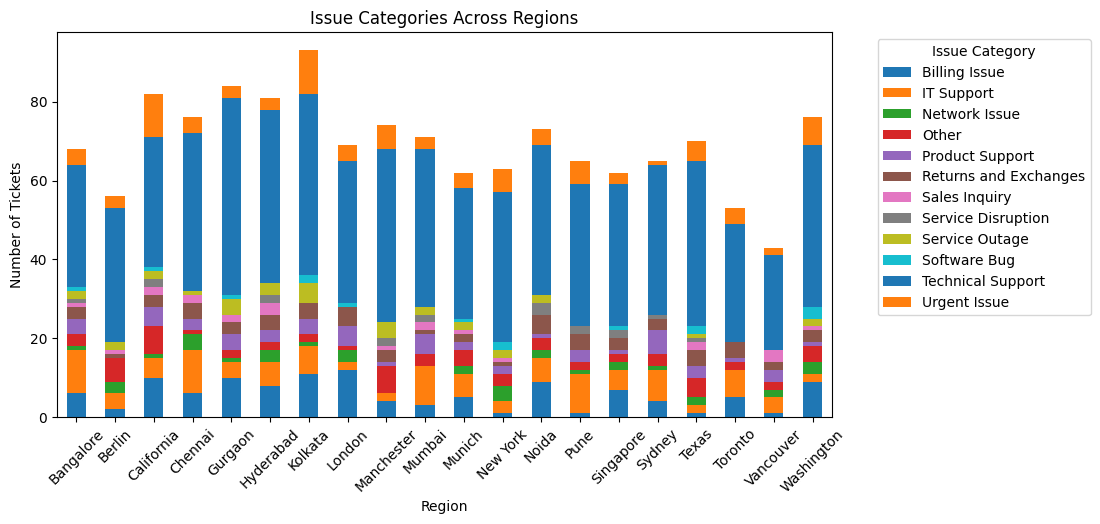

In [ ]:
issue_by_region.plot(
    kind='bar',
    stacked=True,
    figsize=(10,5)
)

plt.title("Issue Categories Across Regions")
plt.xlabel("Region")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=45)
plt.legend(title="Issue Category", bbox_to_anchor=(1.05, 1))
plt.show()


In [ ]:
dominant_issue_by_region = issue_by_region.idxmax(axis=1)

print("Dominant Issue Category per Region:")
print(dominant_issue_by_region)

Dominant Issue Category per Region:
region
Bangalore     Technical Support
Berlin        Technical Support
California    Technical Support
Chennai       Technical Support
Gurgaon       Technical Support
Hyderabad     Technical Support
Kolkata       Technical Support
London        Technical Support
Manchester    Technical Support
Mumbai        Technical Support
Munich        Technical Support
New York      Technical Support
Noida         Technical Support
Pune          Technical Support
Singapore     Technical Support
Sydney        Technical Support
Texas         Technical Support
Toronto       Technical Support
Vancouver     Technical Support
Washington    Technical Support
dtype: object


In [ ]:
# Create issue category count table
issue_by_region = pd.crosstab(
    df['region'],
    df['tag1_primary_issue_type']
)

top_5_issues_per_region = issue_by_region.apply(
    lambda row: list(row.sort_values(ascending=False).head(5).index),
    axis=1
)

for region, issues in top_5_issues_per_region.items():
    print(f"{region:<12} {issues}")


Bangalore    ['Technical Support', 'IT Support', 'Billing Issue', 'Product Support', 'Urgent Issue']
Berlin       ['Technical Support', 'Other', 'IT Support', 'Network Issue', 'Urgent Issue']
California   ['Technical Support', 'Urgent Issue', 'Billing Issue', 'Other', 'Product Support']
Chennai      ['Technical Support', 'IT Support', 'Billing Issue', 'Network Issue', 'Urgent Issue']
Gurgaon      ['Technical Support', 'Billing Issue', 'Product Support', 'IT Support', 'Service Outage']
Hyderabad    ['Technical Support', 'Billing Issue', 'IT Support', 'Returns and Exchanges', 'Urgent Issue']
Kolkata      ['Technical Support', 'Billing Issue', 'Urgent Issue', 'IT Support', 'Service Outage']
London       ['Technical Support', 'Billing Issue', 'Product Support', 'Returns and Exchanges', 'Urgent Issue']
Manchester   ['Technical Support', 'Other', 'Urgent Issue', 'Billing Issue', 'Service Outage']
Mumbai       ['Technical Support', 'IT Support', 'Product Support', 'Billing Issue', 'Urgent Iss

In [ ]:
issue_counts = df['tag1_primary_issue_type'].value_counts()
issue_counts_sorted_desc = issue_counts.sort_values(ascending=False)

print(issue_counts_sorted_desc.index.tolist())


['Technical Support', 'IT Support', 'Billing Issue', 'Urgent Issue', 'Other', 'Returns and Exchanges', 'Product Support', 'Network Issue', 'Service Outage', 'Sales Inquiry', 'Service Disruption', 'Software Bug']


Category-Level Geographic Insights

☆ Technical Support is the dominant issue category across all regions, indicating it forms the core IT support workload.

☆ High-volume regions (Kolkata, Gurgaon, Hyderabad, California) show higher counts of urgent and billing-related issues due to scale.

☆ Service outages and disruptions are relatively low, suggesting stable infrastructure overall.

☆ Geographic patterns show that IT hubs generate more tickets, while smaller regions experience lighter and more balanced issue loads.

04/02/26  (Day 3 Task, Module - 6)
Geographic Performance Comparison
Identify performance measures:
Resolution Time
Average Resolution Time
Analyze performance by region or country:
Calculate average resolution time for each region
Create visualizations:
Bar chart: Region vs Average Resolution Time
Heatmap: Region vs Average Resolution Time
Analyze:
Regions with fastest and slowest resolution
Whether high-ticket-volume regions also have poor performance
Need:Performance comparison charts

In [ ]:
df['resolution_time']


,resolution_time
0,1.0
1,2.0
2,1.0
3,3.0
4,11.0
...,...
1381,1.0
1382,2.0
1383,15.0
1384,10.0


In [ ]:
avg_resolution_by_region = (
    df.groupby('region')['resolution_time']
      .mean()
      .sort_values(ascending=False)
)

print("Average Resolution Time by Region:")
print(avg_resolution_by_region)



Average Resolution Time by Region:
region
Kolkata       6.304878
Vancouver     6.095238
Chennai       5.970588
Sydney        5.966667
Gurgaon       5.902778
California    5.896104
Mumbai        5.895522
Toronto       5.734694
Pune          5.516667
Berlin        5.255319
Washington    5.171429
Singapore     5.052632
Noida         4.840580
New York      4.793103
London        4.730159
Munich        4.535714
Manchester    4.411765
Bangalore     4.295082
Hyderabad     4.103896
Texas         3.807018
Name: resolution_time, dtype: float64


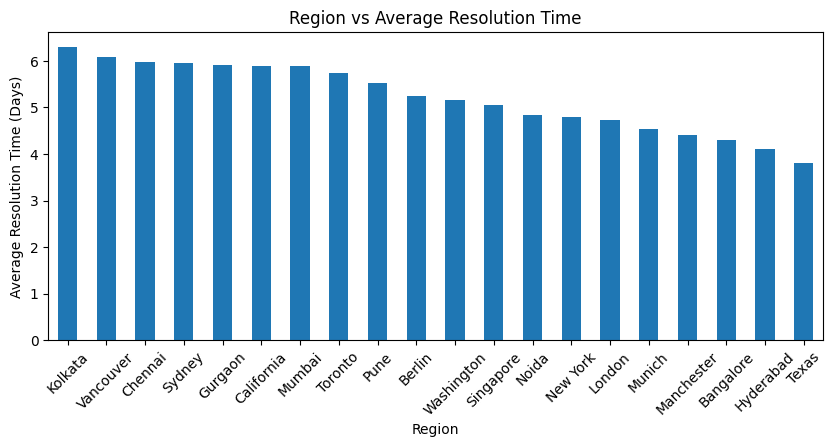

In [ ]:
plt.figure(figsize=(10,4))
avg_resolution_by_region.plot(kind='bar')

plt.title("Region vs Average Resolution Time")
plt.xlabel("Region")
plt.ylabel("Average Resolution Time (Days)")
plt.xticks(rotation=45)
plt.show()

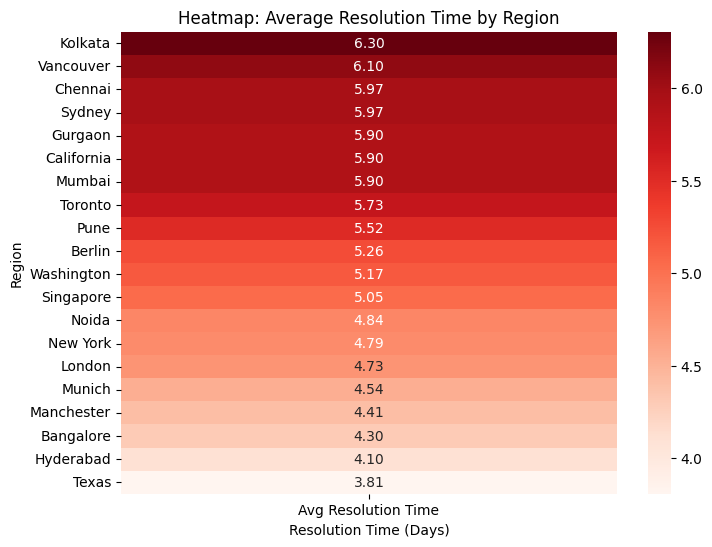

In [ ]:
heatmap_data = avg_resolution_by_region.to_frame(name='Avg Resolution Time')

plt.figure(figsize=(8,6))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="Reds",
    fmt=".2f"
)

plt.title("Heatmap: Average Resolution Time by Region")
plt.xlabel("Resolution Time (Days)")
plt.ylabel("Region")
plt.show()


In [ ]:
avg_resolution_sorted = avg_resolution_by_region.sort_values()
fastest_regions = avg_resolution_sorted.head(5)

print("Fastest Resolving Regions (Lowest Avg Resolution Time):")
print(fastest_regions)

slowest_regions = avg_resolution_sorted.tail(5)

print("\nSlowest Resolving Regions (Highest Avg Resolution Time):")
print(slowest_regions)

Fastest Resolving Regions (Lowest Avg Resolution Time):
region
Texas         3.807018
Hyderabad     4.103896
Bangalore     4.295082
Manchester    4.411765
Munich        4.535714
Name: resolution_time, dtype: float64

Slowest Resolving Regions (Highest Avg Resolution Time):
region
Gurgaon      5.902778
Sydney       5.966667
Chennai      5.970588
Vancouver    6.095238
Kolkata      6.304878
Name: resolution_time, dtype: float64


In [ ]:
# Check If High-Ticket-Volume Regions Have Poor Performance
ticket_volume_by_region = df['region'].value_counts()

performance_vs_volume = pd.DataFrame({
    "Ticket Count": ticket_volume_by_region,
    "Avg Resolution Time": avg_resolution_by_region
})

performance_vs_volume


,Ticket Count,Avg Resolution Time
region,,
Bangalore,68,4.295082
Berlin,56,5.255319
California,82,5.896104
Chennai,76,5.970588
Gurgaon,84,5.902778
Hyderabad,81,4.103896
Kolkata,93,6.304878
London,69,4.730159
Manchester,74,4.411765


Insight

-- High-Ticket-Volume Regions
* Some high-volume regions like Kolkata, Gurgaon, and California show higher-than-average resolution times, indicating performance strain due to workload.

* However, Hyderabad handles a high ticket volume efficiently, with one of the lowest resolution times.

-- Low-Ticket-volume Regions
* Despite lower ticket volumes, regions like Vancouver and Toronto still have high resolution times, suggesting:
- Resource constraints
- Higher issue complexity
- Dependency on external teams

05/02/26  (Day 4 Task, Module - 6)
Cluster Size, Performance Impact  and Final Insights
Identify clusters or grouped issue patterns in the dataset:
Issue category clusters or derived clusters
Calculate:
Cluster size (number of tickets per cluster)
Average resolution time or performance score per cluster
Analyze relationship between:
Cluster size and performance measure
Create visualizations:
Scatter plot: Cluster size vs Performance measure
Bar chart: Cluster vs Average Resolution Time
Write final insights:
Clusters causing performance degradation
Systemic or repetitive issue patterns
Need:
Cluster-performance charts
Final performance insights and recommendations


In [2]:
from google.colab import files
uploaded=files.upload()

Saving 3.2.csv to 3.2.csv


In [6]:
df=pd.read_csv('3.2.csv')

In [14]:
df[['cluster', 'resolution_time']].head()

,cluster,resolution_time
0,4,1.0
1,0,2.0
2,3,1.0
3,1,3.0
4,1,11.0


In [15]:
cluster_size = (
    df['cluster']
    .value_counts()
    .sort_index()
)

print("Cluster Size (Ticket Count per Cluster):")
print(cluster_size)


Cluster Size (Ticket Count per Cluster):
cluster
0    680
1    648
2      3
3      7
4     33
5     15
Name: count, dtype: int64


In [16]:
avg_resolution_by_cluster = (
    df.groupby('cluster')['resolution_time']
      .mean()
      .sort_index()
)

print("Average Resolution Time per Cluster:")
print(avg_resolution_by_cluster)


Average Resolution Time per Cluster:
cluster
0    5.280587
1    5.084459
2    6.666667
3    5.000000
4    5.838710
5    6.857143
Name: resolution_time, dtype: float64


In [17]:
cluster_performance = pd.DataFrame({
    "Cluster Size": cluster_size,
    "Avg Resolution Time": avg_resolution_by_cluster
})

cluster_performance

,Cluster Size,Avg Resolution Time
cluster,,
0,680,5.280587
1,648,5.084459
2,3,6.666667
3,7,5.000000
4,33,5.838710
5,15,6.857143


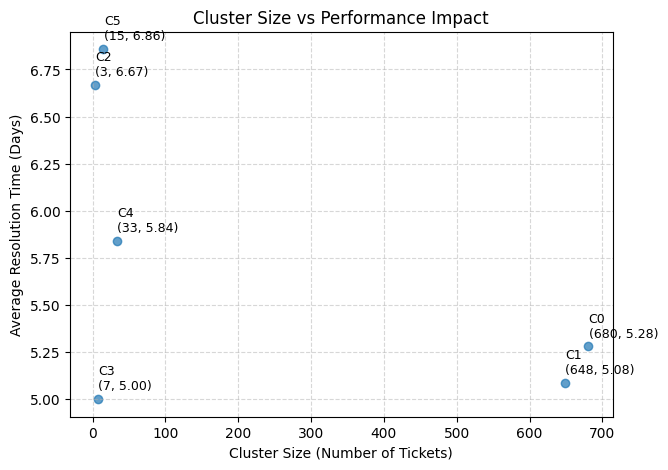

In [ ]:
plt.figure(figsize=(7,5))

plt.scatter(
    cluster_performance['Cluster Size'],
    cluster_performance['Avg Resolution Time'],
    alpha=0.7
)

for cluster_id in cluster_performance.index:
    x = cluster_performance.loc[cluster_id, 'Cluster Size']
    y = cluster_performance.loc[cluster_id, 'Avg Resolution Time']

    plt.text(
        x + 1,
        y + 0.05,
        f"C{cluster_id}\n({x}, {y:.2f})",
        fontsize=9
    )

plt.title("Cluster Size vs Performance Impact")
plt.xlabel("Cluster Size (Number of Tickets)")
plt.ylabel("Average Resolution Time (Days)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


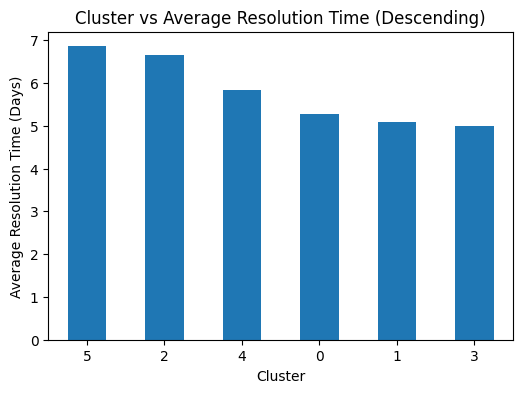

In [ ]:
avg_resolution_by_cluster_desc = (
    avg_resolution_by_cluster.sort_values(ascending=False)
)

plt.figure(figsize=(6,4))
avg_resolution_by_cluster_desc.plot(kind='bar')

plt.title("Cluster vs Average Resolution Time (Descending)")
plt.xlabel("Cluster")
plt.ylabel("Average Resolution Time (Days)")
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Identify dominant issue category per cluster
dominant_issue_by_cluster = (
    df.groupby('cluster')['tag1_primary_issue_type']
      .agg(lambda x: x.value_counts().idxmax())
)

print("Dominant Issue Category per Cluster:")
print(dominant_issue_by_cluster)


Dominant Issue Category per Cluster:
cluster
0    Technical Support
1    Technical Support
2                Other
3    Technical Support
4    Technical Support
5         Software Bug
Name: tag1_primary_issue_type, dtype: object


In [27]:
two_dominant_issue_by_cluster = (
    df.groupby('cluster')['tag1_primary_issue_type']
      .apply(lambda x: x.value_counts().head(2).index.tolist())
)

print(two_dominant_issue_by_cluster)


cluster
0     [Technical Support, Billing Issue]
1        [Technical Support, IT Support]
2                                [Other]
3    [Technical Support, Service Outage]
4      [Technical Support, Urgent Issue]
5                         [Software Bug]
Name: tag1_primary_issue_type, dtype: object


Final Performance Insights

Systemic Issues:
Large clusters dominated by Technical Support indicate recurring user problems and process gaps.

Complex Issues:
Small clusters with Software Bugs and undefined issues cause the highest delays.

Urgent Technical Issues:
Create SLA pressure when not handled through fast-track workflows.




Recommendations

★ Prioritize optimization for large clusters (0 & 1)

  -- Automate repetitive technical support issues

  -- Improve knowledge base and self-service

★ Region-specific resource allocation:
  -- Allocate more support capacity to high-volume regions like Kolkata and Gurgaon, while strengthening specialist support in low-volume but slow-performing regions.

★ Leverage best-performing regions:
  -- Use efficient regions such as Hyderabad as operational benchmarks and replicate their processes in slower regions.

★ Adopt cluster-based performance monitoring:
  -- Track resolution performance by cluster instead of relying only on overall averages to detect early performance bottlenecks.

